# Сегментация пользователей по потреблению банковских продуктов

## Материалы
Презентация для заказчика https://disk.yandex.ru/i/HP4KlpbzQ0IphQ

## Описание проекта

На основе данных о клиентах банка «Метанпром» нужно проанализировать клиентов и сегментировать пользователей для определения сегментов, наиболее склонных к оттоку.

**Цель проекта:** Определить сегменты клиентов, с наибольшей вероятностью желающих отказаться от продуктов банка.
    
**Ход исследования:**
1. Загрузка данных и подготовка их к исследованию:
- поиск дубликатов и пропусков и изучение их природы;
- работа с аномалиями и выбросами;
- добавление столбцов

2. Исследовательский анализ данных:
- портреты типичных клиентов (в целом и в разрезе продуктов); 
- определение процента оттока в целом по банку, по дискретным показателям, 
- распределение оттоковых и неоттоковых клиентов по непрерывным показателям;
- определение категорий клиентов по непрерывным показателям;
- корреляционный анализ.

3. Проверка статистических гипотез (минимум две нулевые гипотезы):
- формулировка нулевой и альтернативной гипотез; 
- выбор и обоснование статистического теста;
- интерпретация результата.

4. Промежуточный вывод о показателях, которые нужно учесть при сегментации.

5. Сегментация на основе выбранных показателей:
- определение сегментов; 
- расчет показателя оттока по сегментам;
- выбор приоритетных сегментов.

**Общий вывод:** Подведение итогов, формулировка ключевых выводов и рекоммендаций. Презентация для заказчика с результатами исследования.

## Загрузка данных и подготовка их к исследованию

### Загрузка данных и получение общей информации

Откроем датафрейм. Выведем первые пять строк, информацию о таблице и построим гистограммы.

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import math as mth

In [2]:
# открываем таблицу, выводим общую информацию о таблице
try:
    data = pd.read_csv('/ds/bank_scrooge.csv')
except:
    data = pd.read_csv(r"C:\Users\Machcreator\data_analyst\bank_segmentation\bank_scrooge.csv")
    
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Датафрейм содержит информацию о клиентах банка «Метанпром»: 
- USERID — идентификатор пользователя,
- score — баллы кредитного скоринга,
- city — город,
- gender — пол,
- age — возраст,
- equity — количество баллов собственности
- balance — баланс на счёте,
- products — количество продуктов, которыми пользуется клиент,
- credit_card — есть ли кредитная карта,
- last_activity — активный клиент,
- EST_SALARY — оценочный доход клиента,
- сhurn — признак оттока.

Столбцы с названием города и полом ожидаемо содержат строковую информацию. 

Посмотрим, как распределены числовые значения.

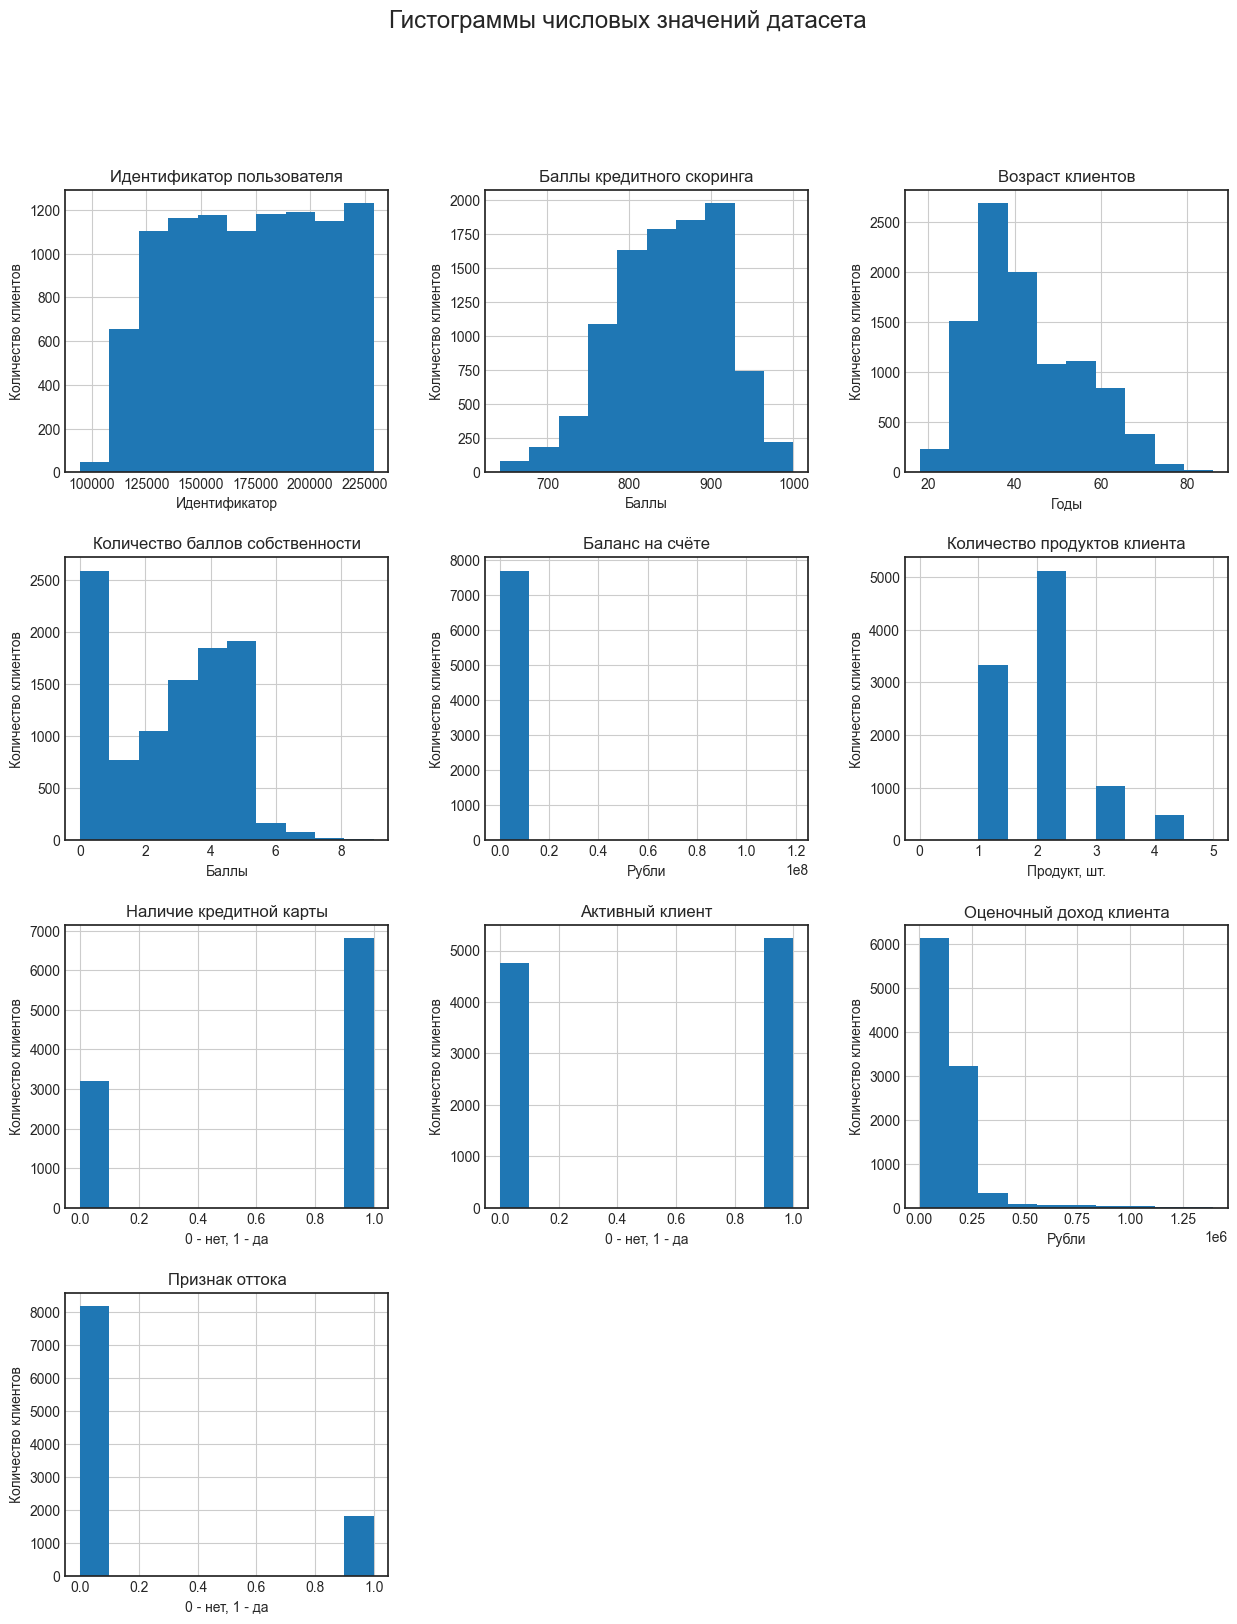

In [4]:
plt.style.use('seaborn-white')

axes = data.hist(figsize = (15,18))
axes[0,0].set_title('Идентификатор пользователя')
axes[0,0].set_xlabel('Идентификатор')
axes[0,0].set_ylabel('Количество клиентов')

axes[0,1].set_title('Баллы кредитного скоринга')
axes[0,1].set_xlabel('Баллы')
axes[0,1].set_ylabel('Количество клиентов')

axes[0,2].set_title('Возраст клиентов')
axes[0,2].set_xlabel('Годы')
axes[0,2].set_ylabel('Количество клиентов')

axes[1,0].set_title('Количество баллов собственности')
axes[1,0].set_xlabel('Баллы')
axes[1,0].set_ylabel('Количество клиентов')

axes[1,1].set_title('Баланс на счёте')
axes[1,1].set_xlabel('Рубли')
axes[1,1].set_ylabel('Количество клиентов')

axes[1,2].set_title('Количество продуктов клиента')
axes[1,2].set_xlabel('Продукт, шт.')
axes[1,2].set_ylabel('Количество клиентов')

axes[2,0].set_title('Наличие кредитной карты')
axes[2,0].set_xlabel('0 - нет, 1 - да')
axes[2,0].set_ylabel('Количество клиентов')

axes[2,1].set_title('Активный клиент')
axes[2,1].set_xlabel('0 - нет, 1 - да')
axes[2,1].set_ylabel('Количество клиентов')

axes[2,2].set_title('Оценочный доход клиента')
axes[2,2].set_xlabel('Рубли')
axes[2,2].set_ylabel('Количество клиентов')

axes[3,0].set_title('Признак оттока')
axes[3,0].set_xlabel('0 - нет, 1 - да')
axes[3,0].set_ylabel('Количество клиентов')

plt.suptitle('Гистограммы числовых значений датасета', ha='center', fontsize='xx-large')
plt.show();

При первом приближении видим, что есть выбросы по балансу на счете (свыше 20 000 000 руб.) и оценочному доходу (свыше 1 000 000 руб.). Заметно, что есть клиенты, которые не пользуются ни одним продуктом.

Приведем названия столбцов к общепринятому виду.

In [5]:
# переименовываем колонки
data.columns = data.columns.str.lower()
data = data.rename(columns={'userid':'user_id'})
data.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

### Поиск дубликатов

Проверим, есть ли полные дубликаты и по идентификатору пользователя.

In [6]:
print(f'Количество дубликатов: {data.duplicated().sum()}') 

user_id_dupl = data.loc[data.duplicated(subset=['user_id']), 'user_id']
print(f'Количество дубликатов по идентификатору: {user_id_dupl.count()}')

Количество дубликатов: 0
Количество дубликатов по идентификатору: 73


Выведем три пары дубликатов по 'user_id'.

In [7]:
# дубликаты по ид
data.loc[data['user_id'].isin(list(user_id_dupl))].sort_values(by='user_id').head(6)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1


Вероятно, в какой-то период времени в Ярославле и Рыбинске присваивали одни и те же ID разным клиентам. Чтобы это проверить выведем таблицу с дубликатами по идентификатору пользователя и городу, а также список городов.

In [8]:
display(data.loc[data['user_id'].isin(list(user_id_dupl)), 'city'].value_counts())
display(data.loc[data.duplicated(subset=['user_id', 'city'])==True])

Рыбинск      73
Ярославль    73
Name: city, dtype: int64

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


In [9]:
user_id_dupl_index = data.loc[data['user_id'].isin(list(user_id_dupl))].sort_values(by='user_id').index
user_id_dupl_index

Int64Index([1893, 7694, 7542, 4866, 5896, 5863, 1411, 8638, 8164, 9775,
            ...
            9104, 6446, 8070, 6412, 4216, 2597, 8205, 8497, 6457, 1247],
           dtype='int64', length=146)

In [10]:
data.loc[user_id_dupl_index]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2597,226719,990.0,Ярославль,М,37.0,4,14648692.14,2,0,0,934412.61,1
8205,227795,840.0,Рыбинск,М,34.0,2,350768.03,1,1,0,102036.14,1
8497,227795,839.0,Ярославль,М,34.0,2,326593.14,2,1,0,103314.92,0
6457,228075,839.0,Рыбинск,М,39.0,5,507199.85,3,0,1,85195.80,0


Предположение подтвердилось. 73 одинаковых идентификатора есть у клиентов из Ярославля и Рыбинска. Внутри города идентификаторы не дублируются, данные за ними скрываются разные. Сделаем их уникальными, добавив 1 000 000 для Ярославля (нам могут понадобиться уникальные ID). Поскольку сейчас у нас нет ID свыше 250 000, мы не рискуем задвоить другой используемый ID.

In [11]:
data.loc[(data['user_id'].isin(list(user_id_dupl)) & (data['city']=='Ярославль')), 'user_id'] += 1000000
data.loc[user_id_dupl_index]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,1116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,1117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,1120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2597,1226719,990.0,Ярославль,М,37.0,4,14648692.14,2,0,0,934412.61,1
8205,227795,840.0,Рыбинск,М,34.0,2,350768.03,1,1,0,102036.14,1
8497,1227795,839.0,Ярославль,М,34.0,2,326593.14,2,1,0,103314.92,0
6457,228075,839.0,Рыбинск,М,39.0,5,507199.85,3,0,1,85195.80,0


### Обработка пропусков

Узнаем, в каких столбцах есть пропуски.

In [12]:
data.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Пропуски есть только в столбцах с возрастом и балансом.

Выведем все записи с пропусками в возрасте.

In [13]:
data.loc[data['age'].isna()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,1228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,1221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


У большинства клиентов без указания возраста высокий скоринговый балл, нет собственности (или она низко оценивается, например, квартира в ипотеке), всего один кредитный продукт и есть кредитная карта. Все выглядит, как массовая раздача кредитных карт потенциально интересным заемщикам, во время которой данные по возрасту не были зафиксированы, а может это просто ошибки при парсинге. Пропуски по возрасту других клиентов также объясняются ошибкой при заполнении или сборе данных. Возраст вывести логически не представляется возможным. Поскольку пропусков меньше 1%, удалим данные с такими пропусками из основного анализа.

In [14]:
# удаляем строки
new_data = data.dropna(subset=['age']).copy()

# проверяем, сколько строк с пропуском в возрасте
new_data.loc[new_data['age'].isna(), 'user_id'].count()

0

Перейдем к пропускам по балансу. Известно, что пропуски могут быть связаны с использованием кредитных продуктов, некоторых кредитных карт, других продуктов, не требующих открытия текущего счета, или ошибкой при парсинге. Узнаем, сколько пропусков у владельцев кредитных карт, пользующихся только одним продуктом. Вероятнее всего, эти пропуски связаны особенностью продукта.

In [15]:
data.loc[(data['credit_card']==1) & (data['products']==1), 'balance'].isna().sum()

1599

Теперь посмотрим, сколько человек не имеют кредитной карты, не имеют информации о балансе, используют один продукт и имеют оценку собственности равной нулю.

In [16]:
data.loc[(data['credit_card']==0) & (data['products']==1) & (data['equity']==0), 'balance'].isna().sum()

337

С высокой долей вероятности 337 человек имеют в нашем банке только кредит или ипотеку, поскольку считаем, что при отсутствии недвижимости/автотранспорта или недвижимости в ипотеке собственность для банков ценности не предстваляет.

Осталось понять сколько людей имеют кредит или ипотеку и кредитку.

In [17]:
data.loc[(data['credit_card']==1) & (data['products']==2) & (data['equity']==0), 'balance'].isna().sum()

246

Из 2295 проспуков 2182 вероятнее всего связаны с использованием только кредитных продуктов. 113 пропусков также могли возникнуть из-за особенностей продуктов, но у таких клиентов уже больше одного продукта кроме кредитной карты, не влияющего на баланс.

Поскольку пропусков по балансу больше 5%, удалить их без потери большой части информации мы не можем. От использования заглушек тоже откажемся во избежании потенциальных ошибок при расчете корреляции. Поскольку пропусков по ошибке помимо этого столбца нет или крайне мало (по возрасту), приходим к выводу, что это не ошибки. Оставим пропуски без изменений и будем считать, что они соответствуют кредитным продуктам.

### Работа с аномалиями и выбросами

Начнем с определения клиентов, не использующих не один продукт банка.

In [18]:
data.query('products == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


Всего одна женщина из Рыбинска не использует ни один продукт банка и не является активной. Можем сделать вывод, что она по какой-то причине уже не является клиентом банка. Удалим эту запись из данных для анализа.

In [19]:
new_data = new_data.query('products > 0').copy()
new_data.query('products == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


На первый взгляд, свыше 20 000 000 руб. на балансе - выбросы. Посмотрим, ближе на распределение баланса.

In [20]:
# Напишем и применим функцию для определения нормального размаха
def whiskers(ser):
    iqr = ser.quantile(0.75) - ser.quantile(0.25)
    lower_bound = max(ser.quantile(0.25) - (1.5 * iqr), ser.min())
    upper_bound = min(ser.quantile(0.75) + (1.5 * iqr), ser.max())
    return 'Нормальный размах:', lower_bound, upper_bound

data['balance'].describe(), whiskers(data['balance'])

(count    7.705000e+03
 mean     8.277943e+05
 std      1.980614e+06
 min      0.000000e+00
 25%      2.955542e+05
 50%      5.242722e+05
 75%      9.807058e+05
 max      1.191136e+08
 Name: balance, dtype: float64,
 ('Нормальный размах:', 0.0, 2008433.3849999998))

Половина клиентов с положительным балансом имеют на счетах от 295 552 рублей до 980 705 рублей. Баланс свыше 2 008 434 рублей не характерен для нашей выборки. Будем считать, что клиенты с балансом свыше 2 000 000 рублей - VIP клиенты.

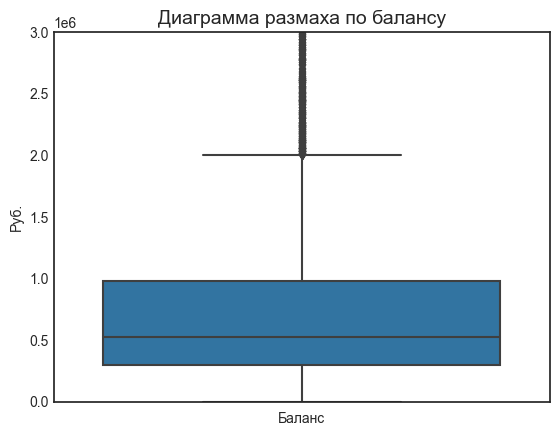

In [21]:
sns.boxplot(y='balance', data=data);
plt.title('Диаграмма размаха по балансу', fontsize=14)
plt.xlabel('Баланс')
plt.ylabel('Руб.')
plt.ylim(0,3000000);

Рассмотрим числовое описание оценочного дохода.

In [22]:
data['est_salary'].describe(), whiskers(data['est_salary'])

(count    1.000000e+04
 mean     1.478669e+05
 std      1.393885e+05
 min      2.546300e+03
 25%      7.525190e+04
 50%      1.196581e+05
 75%      1.745005e+05
 max      1.395064e+06
 Name: est_salary, dtype: float64,
 ('Нормальный размах:', 2546.3, 323373.50625))

75% клиентов имеют доход до 174 500 рублей. Доход свыше 323 374 рублей - выбросы. Будем считать, что клиенты с доходом свыше 325 000 рублей - VIP клиенты.

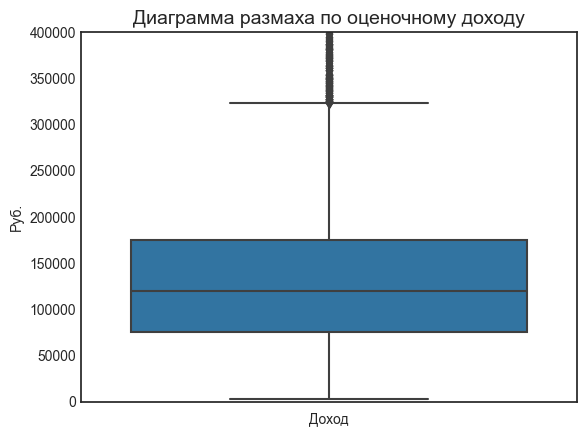

In [23]:
sns.boxplot(y='est_salary', data=data);
plt.title('Диаграмма размаха по оценочному доходу', fontsize=14)
plt.xlabel('Доход')
plt.ylabel('Руб.')
plt.ylim(0,400000);

Проверим, какой процент изначальных данных остался.

In [24]:
round(new_data['user_id'].count()/data['user_id'].count() *100, 2)

99.73

После работы с пропусками, дубликатами и аномалиями осталось 99,73% от изначальных данных. Потеря допустимая.

### Добавление столбцов

Выполним кодировку категориальных признаков пол и город.

In [25]:
new_data_copy = new_data.copy()
new_data = pd.get_dummies(new_data, columns=['gender', 'city'])
new_data['city'] = new_data_copy['city'] 
new_data['gender'] = new_data_copy['gender']
new_data.head()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_Ж,gender_М,city_Ростов,city_Рыбинск,city_Ярославль,city,gender
0,183012,850.0,25.0,1,59214.82,2,0,1,75719.14,1,1,0,0,1,0,Рыбинск,Ж
1,146556,861.0,37.0,5,850594.33,3,1,0,86621.77,0,1,0,0,1,0,Рыбинск,Ж
2,120722,892.0,30.0,0,NaN,1,1,1,107683.34,0,1,0,0,1,0,Рыбинск,Ж
3,225363,866.0,51.0,5,1524746.26,2,0,1,174423.53,1,1,0,0,0,1,Ярославль,Ж
4,157978,730.0,34.0,5,174.00,1,1,0,67353.16,1,0,1,0,0,1,Ярославль,М


Выведем информацию о таблице, готовой к анализу.

In [26]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         9973 non-null   int64  
 1   score           9973 non-null   float64
 2   age             9973 non-null   float64
 3   equity          9973 non-null   int64  
 4   balance         7695 non-null   float64
 5   products        9973 non-null   int64  
 6   credit_card     9973 non-null   int64  
 7   last_activity   9973 non-null   int64  
 8   est_salary      9973 non-null   float64
 9   churn           9973 non-null   int64  
 10  gender_Ж        9973 non-null   uint8  
 11  gender_М        9973 non-null   uint8  
 12  city_Ростов     9973 non-null   uint8  
 13  city_Рыбинск    9973 non-null   uint8  
 14  city_Ярославль  9973 non-null   uint8  
 15  city            9973 non-null   object 
 16  gender          9973 non-null   object 
dtypes: float64(4), int64(6), object(2

___
Названия столбцов приведены к общепринятому виду. 

Полных дубликатов в датасете не было обнаружено. 73 идентификатора пользователя использовались одновременно и в Ярославле, и в Рыбинске. Теперь ID уникальные (Ярославле на 1 000 000 больше, чем в Рыбинске).

Пропуски в данных по возрасту были удалены, т.к. их меньше 1% и возникли они по техническим причинам. Пропуски в данных по балансу сохранены, поскольку их больше 20% и они часто свидетельствуют об использовании клиентом кредитного продукта.

В очищенный датасет не попала запись о клиенте без единого продукта (аномалия). Записи с балансом свыше 2 000 000 руб. (выбросы) и записи с оценочным доходом свыше 325 000 руб. (выбросы) решено оставить и определить их как VIP клиентов. В итоговом датасете сохранено более 99% изначальных данных.

Добавлены столбцы, отражающию категориальные признаки города и пола.

## Исследовательский анализ данных

### Портреты типичных клиентов

Рассмотрим, как выглядит типичный клиент банка. Для этого узнаем медианные значения всех показателей

In [27]:
# создаем список показателей
columns_name = ['score',
 'age',
 'equity',
 'balance',
 'products',
 'credit_card',
 'last_activity',
 'est_salary',
 'churn',
'gender_Ж', 'gender_М']

new_data[columns_name].describe()

,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_Ж,gender_М
count,9973.000000,9973.000000,9973.000000,7.695000e+03,9973.000000,9973.000000,9973.000000,9.973000e+03,9973.000000,9973.000000,9973.000000
mean,848.671212,42.730773,2.630803,8.272456e+05,1.871653,0.680237,0.522912,1.477991e+05,0.182292,0.499549,0.500451
std,65.393153,12.175166,1.980060,1.980327e+06,0.792547,0.466408,0.499500,1.392871e+05,0.386105,0.500025,0.500025
min,642.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.546300e+03,0.000000,0.000000,0.000000
25%,802.000000,33.000000,0.000000,2.956987e+05,1.000000,0.000000,0.000000,7.525202e+04,0.000000,0.000000,0.000000
50%,853.000000,40.000000,3.000000,5.242953e+05,2.000000,1.000000,1.000000,1.196431e+05,0.000000,0.000000,1.000000
75%,900.000000,51.000000,4.000000,9.800512e+05,2.000000,1.000000,1.000000,1.745000e+05,0.000000,1.000000,1.000000
max,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000,1.000000,1.000000


Среднестатический клиент банка - 40-летний человек, с оценочным доходом 115 743 рубля, с 850 баллами кредитного скоринга (благонадежный заемщик), с оценкой собственности в 3 балла, балансом на карте 506 433 рубля, использующий два продукта, один из которых кредитная карта, не собирающийся покидать банк.

Посмотрим, есть ли разница в портретах в зависимости от количества продуктов. Сначала узнаем, сколько клиентов использует какое количество продуктов использует.

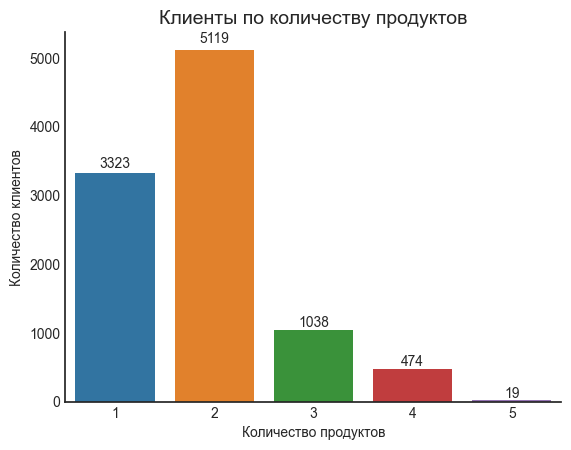

In [28]:
# пишем функцию для подписи вертикальных баров
def autolabel(rects, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        
        try:
            label = int(height)
            ax.text(rect.get_x() + rect.get_width()/2., height_factor*height, f'{label}', ha='center', va='bottom')  
        except:
            label = 0
            ax.text(rect.get_x() + rect.get_width()/2., height_factor*1, f'{label}', ha='center', va='bottom')

ax = sns.countplot(x = "products", data = new_data)
autolabel(ax.patches, height_factor=1.01)
ax.set_title('Клиенты по количеству продуктов', fontsize=14)
ax.set_xlabel('Количество продуктов')
ax.set_ylabel('Количество клиентов')
sns.despine(top=True, right=True, left=False, bottom=False);

Пять продуктов есть только у 19 клиентов, что ничтожно мало для обоснованных выводов. Данных для формирования типичного портрета пользователя пяти продуктов недостаточно.

Выведем медианы по всем показателям в разбивке по продуктам.

In [29]:
products_count = sorted(list(new_data['products'].unique()))
for j in products_count:
    print('-'*25)
    print('Количество продуктов:', j)
    new_data_j = new_data.loc[new_data['products'] == j]
    for i in columns_name:
        print(i, new_data_j[i].median())


-------------------------
Количество продуктов: 1
score 883.0
age 40.0
equity 0.0
balance 415369.49
products 1.0
credit_card 1.0
last_activity 1.0
est_salary 142163.0
churn 0.0
gender_Ж 0.0
gender_М 1.0
-------------------------
Количество продуктов: 2
score 844.0
age 40.0
equity 3.0
balance 515461.0
products 2.0
credit_card 1.0
last_activity 1.0
est_salary 109508.21
churn 0.0
gender_Ж 1.0
gender_М 0.0
-------------------------
Количество продуктов: 3
score 828.0
age 42.0
equity 4.0
balance 665382.31
products 3.0
credit_card 0.0
last_activity 0.0
est_salary 105655.975
churn 0.0
gender_Ж 1.0
gender_М 0.0
-------------------------
Количество продуктов: 4
score 874.0
age 38.0
equity 4.0
balance 939342.895
products 4.0
credit_card 1.0
last_activity 1.0
est_salary 122472.51000000001
churn 1.0
gender_Ж 0.0
gender_М 1.0
-------------------------
Количество продуктов: 5
score 851.0
age 37.0
equity 4.0
balance 282262.33
products 5.0
credit_card 1.0
last_activity 1.0
est_salary 106033.79
churn 0

Для упрощения восприятия визуализируем числовые показатели диаграммой размаха.

-------------------------


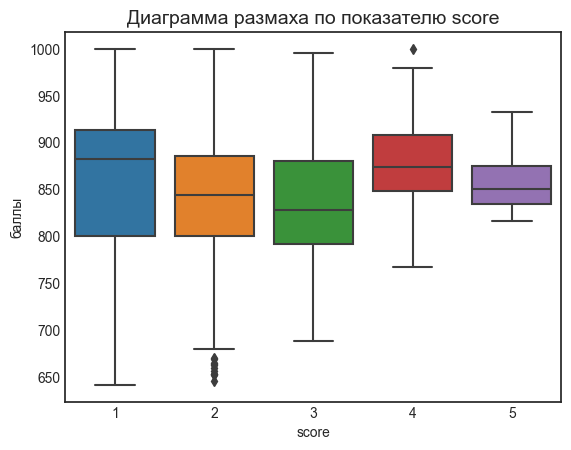

-------------------------


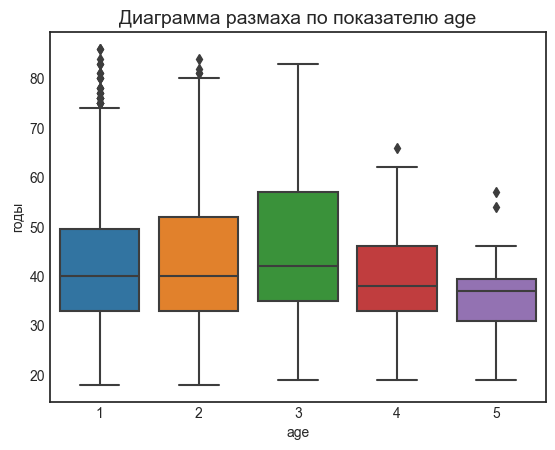

-------------------------


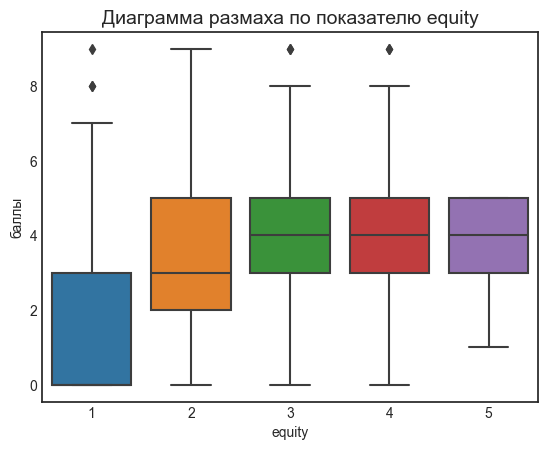

-------------------------


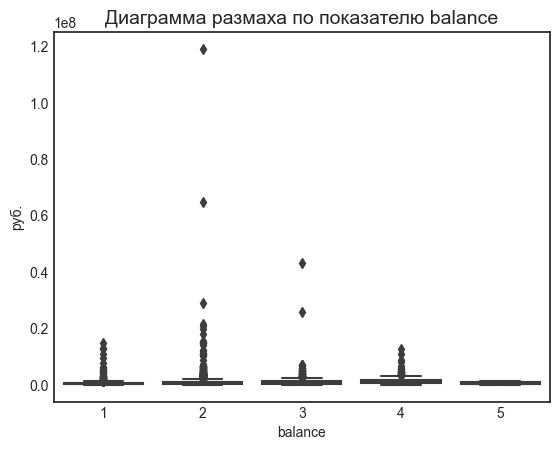

-------------------------


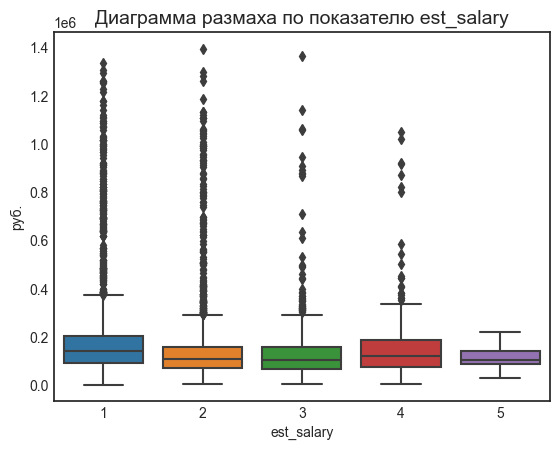

In [30]:
columns_name_boxplot = ['score',
 'age',
 'equity',
 'balance',
 'est_salary']

for i in columns_name_boxplot:
    print('-'*25)
    
    if i=='score' or i=='equity':
        a='баллы'
    elif i=='age':
        a='годы'
    else:
        a='руб.'

    sns.boxplot(x='products', y=i, data=new_data);
    plt.title(f'Диаграмма размаха по показателю {i}', fontsize=14)
    plt.xlabel(i)
    plt.ylabel(a)
    plt.show()

С ростом кличества продуктов с одного до трех скоринговый балл падает. При четырех продуктах медианы скорингового балла находятся между одним и двумя продуктами. Вне зависимости от количества продуктов все клиенты банка имеют хороший скоринговый балл.

Клиенты с четырьмя продуктами банка стабильно моложе (38 лет). Затем идут клиенты с одним и двумя продуктами (40 лет). Клиенты с тремя продуктами, в основном, самые старшие (42 года).

Не меньше половины клиентов с одним продуктом чаще имеют нулевой балл по оценке собственности. Медианный балл для двух продуктов - 3, для трех и четырех продуктов - 4. Можно предположить, что люди с тремя и более продуктами более состоятельные.

Медианный баланс растет вместе с количеством продуктов с одного до четырех. Возможно, это связано с типичным добавлением продуктов. Например, первый - кредитный, второй - кредитный и дебетовый и т.д., то есть с каждым дополнительным продуктом увеличивается количество лицевых счетов, отражаемых на балансе (пять продуктов не учитываем в анализе). 

Медианный доход выше у клиентов с одним продуктом - 142 508 руб., ниже с тремя продуктами - 105 655 руб., медианный доход с двумя и четырьмя продуктами составляет 109 508 руб. и 122 472 руб. соответственно.

Как уже отмечено выше, для выводов по типичному портрету клиента с пятью продуктами недостаточно данных.

Категориальные и бинарные данные визуализируем круговой диаграммой.

----------------------------------------------------------------------------------------------------


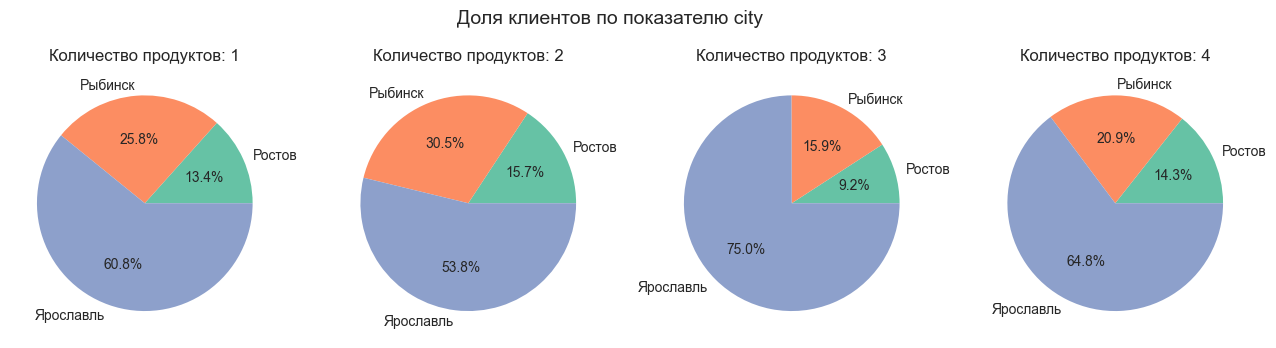

----------------------------------------------------------------------------------------------------


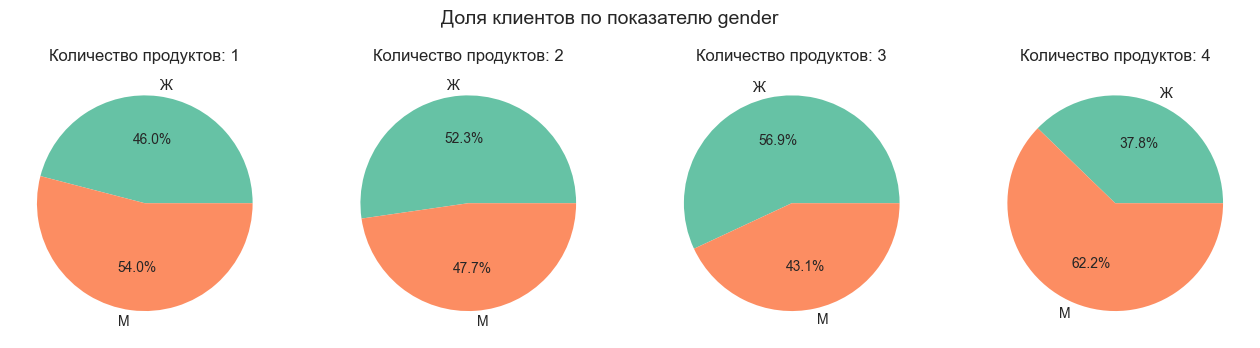

----------------------------------------------------------------------------------------------------


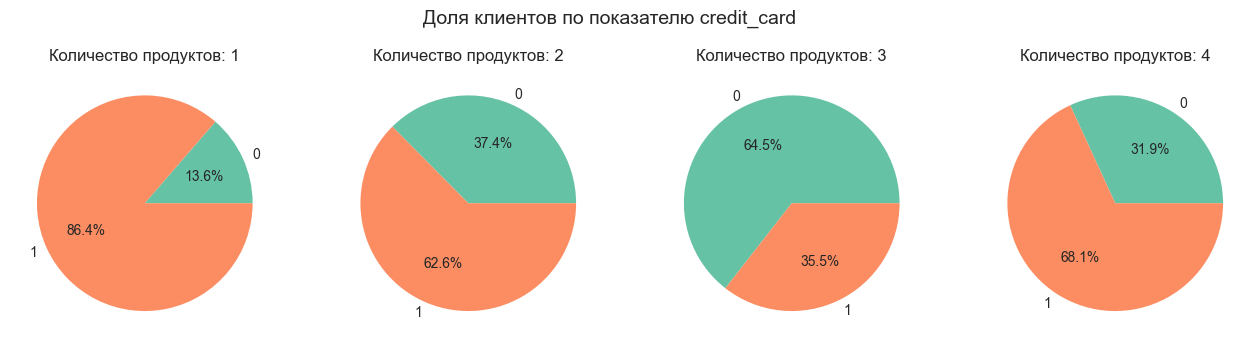

----------------------------------------------------------------------------------------------------


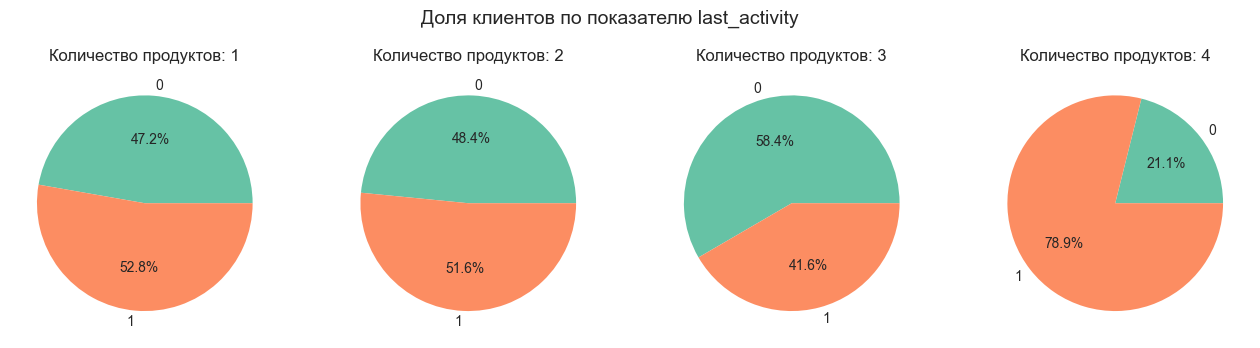

----------------------------------------------------------------------------------------------------


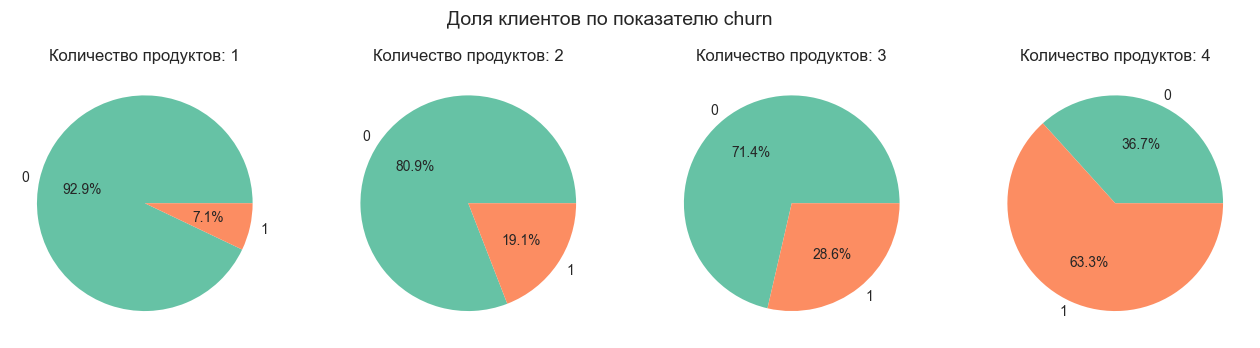

In [31]:
products_count = products_count[0:4]

columns_name_bar = ['city',
 'gender',
 'credit_card',
 'last_activity',
 'churn']

for i in columns_name_bar:
    print('-'*100)
    
    fig, axes = plt.subplots(1, 4, figsize=(16,4))
    with sns.color_palette('Set2'):
        for j in products_count:
            new_data_j = new_data.loc[new_data['products'] == j]. pivot_table(index=i, values='user_id', aggfunc='count')
            new_data_j.plot(kind='pie', y='user_id', legend=False, title=f'Количество продуктов: {j}', 
            ylabel='', autopct='%1.1f%%', ax=axes[j-1])
        
    plt.suptitle(f'Доля клиентов по показателю {i}', fontsize=14)
    plt.show()


Среди пользователей одним и четырьмя продуктами преобладают мужчины, двумя и тремя - женщины. Процент наличия кредитной карты падает с ростом количества продуктов вплоть до трех, и только при четырех продуктах резко увеличивается (возможно используются, как инструмнт финансовой деятельности). Показатель оттока растет с ростом количества продуктов. Держатели четырех продуктов проявляют повышенную активность.

У нас нет информации, сколько у банка всего продуктов (мы знаем, что клиенты используют максимум пять) и какие они. Условно разделим все продукты на дебетовые и кредитные.
Посмотрим, какими дебетовыми или кредитными пользуются клиенты банка с одним продуктом.

In [32]:
# функция для определения вида продукта (1 продукт)
def product_1(row):
    if row['credit_card']==1:
        product_type = 'кредитная карта'
    else:
        if row['balance']>=0:
            product_type = 'дебетовый продукт'
        else:
            product_type = 'кредит'
    return product_type

new_data_1 = new_data.loc[new_data['products'] == 1]
with pd.option_context('mode.chained_assignment', None):
    new_data_1['product_type'] = new_data_1.apply (product_1, axis=1)

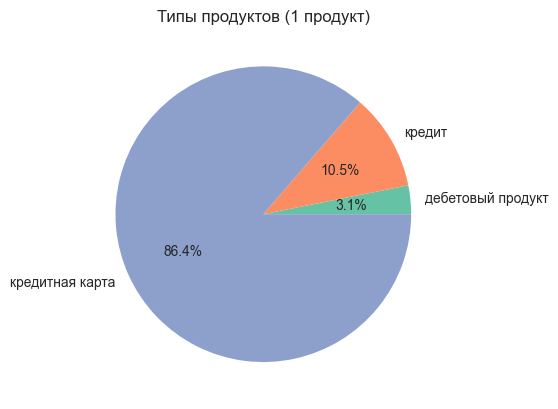

In [33]:
with sns.color_palette('Set2'):
    new_data_1.pivot_table(index='product_type', values='user_id', aggfunc='count').plot(kind='pie', y='user_id', 
                                                                                         legend=False, title='Типы продуктов (1 продукт)', 
                                                                                         ylabel='', autopct='%1.1f%%');


Среди клиенты с одним продуктом дебетовые продукты составляют только 3,1%. 

Посмотрим, что можно сказать о клиентах с двумя продуктами.

In [34]:
# функция для определения вида продукта (2 продукта)
def product_2(row):
    if row['credit_card']==1:
        if row['balance']>=0:
            product_type = 'кредитная карта и какой-либо продукт'
        else:
            product_type = 'только кредитные продукты'
    else:
        if row['balance']>=0:
            product_type = 'есть дебетовый продукт'
        else:
            product_type = 'только кредитные продукты'
    return product_type

new_data_2 = new_data.loc[new_data['products'] == 2]
with pd.option_context('mode.chained_assignment', None):
    new_data_2['product_type'] = new_data_2.apply (product_2, axis=1)

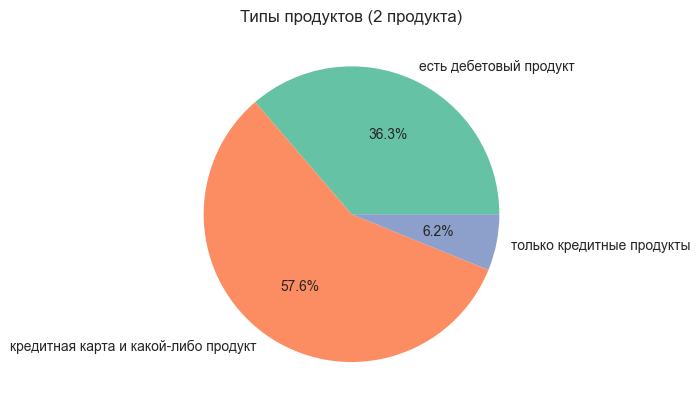

In [35]:
with sns.color_palette('Set2'):
    new_data_2.pivot_table(index='product_type', values='user_id', aggfunc='count').plot(kind='pie', y='user_id', 
                                                                                         legend=False, title='Типы продуктов (2 продукта)', 
                                                                                         ylabel='', autopct='%1.1f%%');


У 36,3% клиентов с двумя продуктами точно есть хотя бы один дебетовый продукт.

In [36]:
# функция для определения вида продукта (2 продукта)
def product_3(row):
    if row['credit_card']==1:
        if row['balance']>=0:
            product_type = 'кредитная карта и какие-либо продукты'
        else:
            product_type = 'только кредитные продукты'
    else:
        if row['balance']>=0:
            product_type = 'есть дебетовый продукт'
        else:
            product_type = 'только кредитные продукты'
    return product_type

new_data_3 = new_data.loc[new_data['products'] == 3]
with pd.option_context('mode.chained_assignment', None):
    new_data_3['product_type'] = new_data_3.apply (product_3, axis=1)

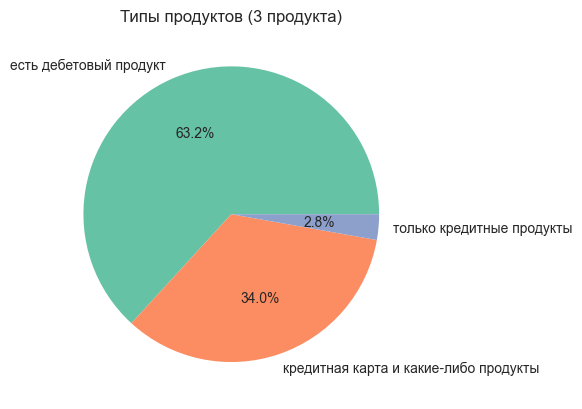

In [37]:
with sns.color_palette('Set2'):
    new_data_3.pivot_table(index='product_type', values='user_id', aggfunc='count').plot(kind='pie', y='user_id', 
                                                                                         legend=False, title='Типы продуктов (3 продукта)', 
                                                                                         ylabel='', autopct='%1.1f%%');


Среди клиентов с тремя продуктами у 63,2% есть хотя бы один дебетовый продукт, только кредитные продукты есть лишь у 2,8% клиентов.

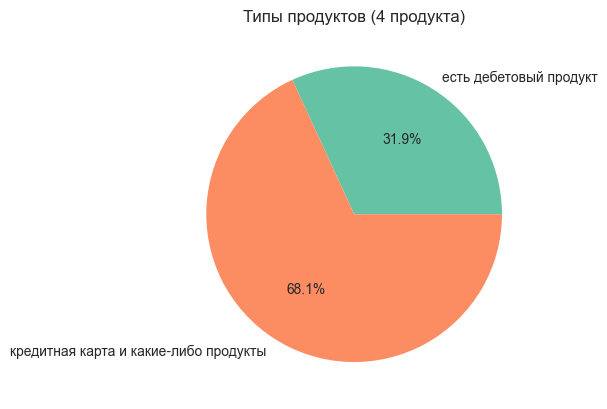

In [38]:
new_data_4 = new_data.loc[new_data['products'] == 4]
with pd.option_context('mode.chained_assignment', None):
    new_data_4['product_type'] = new_data_4.apply (product_3, axis=1)
with sns.color_palette('Set2'):
    new_data_4.pivot_table(index='product_type', values='user_id', aggfunc='count').plot(kind='pie', y='user_id', 
                                                                                         legend=False, title='Типы продуктов (4 продукта)', 
                                                                                         ylabel='', autopct='%1.1f%%');


Практически у всех клиентов с четырьмя продуктами есть дебетовый продукт (ведь только 2,8% клиентов с тремя продуктами точно имели 3 кредитных продукта, вероятность, что среди четырех продуктов все кредиты крайне мала), нет ни одного клиента точно имеющих только кредитные продукты.

### Определение процента оттока в целом по банку и по дискретным показателям

Вычислим процент оттока в среднем по банку.

In [39]:
round(new_data['churn'].mean(),3)

0.182

Средний отток - 18,2%. Будем использовать этот показатель, как ориентир для сравнения.

In [40]:
# создаем список показателей
columns_name = ['city',
 'gender',
 'equity',
 'products',
 'credit_card',
 'last_activity']

for i in columns_name:
    print('-'*25)
    print(f'Отток и общее количество клиентов в разбивке по показателю {i}')
    new_data_i = new_data.pivot_table(index=i, values='churn', aggfunc='mean').reset_index()
    new_data_ii = new_data[i].value_counts().reset_index()
    new_data_ii.columns = [i, 'count']
    new_data_i = new_data_i.merge(new_data_ii, on=i).set_index(i)
 
    display(new_data_i.style.background_gradient('coolwarm'))

-------------------------
Отток и общее количество клиентов в разбивке по показателю city


,churn,count
city,,
Ростов,0.187147,1416
Рыбинск,0.162565,2682
Ярославль,0.190128,5875


-------------------------
Отток и общее количество клиентов в разбивке по показателю gender


,churn,count
gender,,
Ж,0.127459,4982
М,0.237027,4991


-------------------------
Отток и общее количество клиентов в разбивке по показателю equity


,churn,count
equity,,
0,0.034938,2576
1,0.120310,773
2,0.157945,1051
3,0.208442,1540
4,0.251218,1847
5,0.300783,1915
6,0.360248,161
7,0.462500,80
8,0.352941,17


-------------------------
Отток и общее количество клиентов в разбивке по показателю products


,churn,count
products,,
1,0.070719,3323
2,0.191053,5119
3,0.286127,1038
4,0.632911,474
5,0.421053,19


-------------------------
Отток и общее количество клиентов в разбивке по показателю credit_card


,churn,count
credit_card,,
0,0.255566,3189
1,0.147848,6784


-------------------------
Отток и общее количество клиентов в разбивке по показателю last_activity


,churn,count
last_activity,,
0,0.113703,4758
1,0.244871,5215


Высокий отток показывают следующие категории по показателям:
- мужчины 
- жители Ярославля
- владельцы собственности с оценкой выше 2 баллов
- без кредитной карты
- пользователи 3х и 4х продуктов
- активные пользователи.

### Распределение оттоковых и неоттоковых клиентов по непрерывным показателям

-------------------------
Распределение оттоковых и неоттоковых клиентов по показателю score


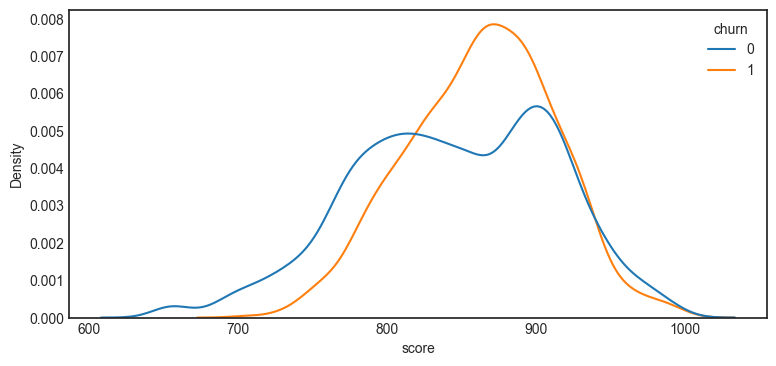

-------------------------
Распределение оттоковых и неоттоковых клиентов по показателю age


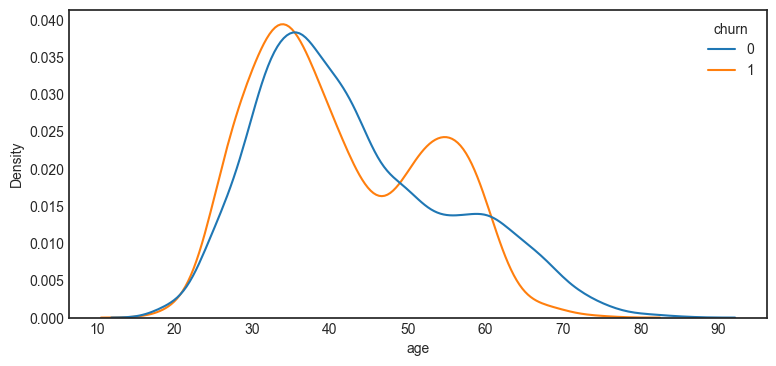

-------------------------
Распределение оттоковых и неоттоковых клиентов по показателю balance


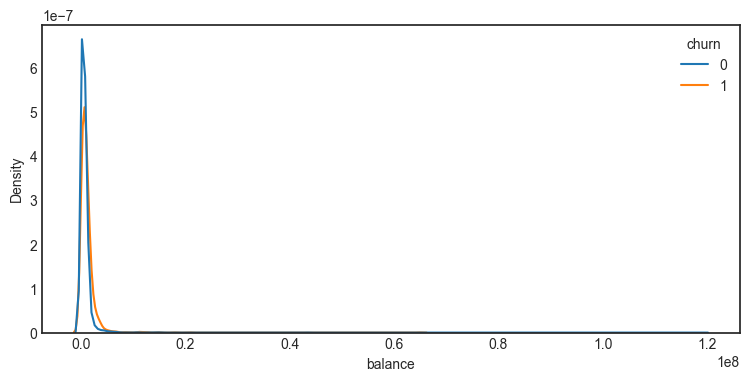

-------------------------
Распределение оттоковых и неоттоковых клиентов по показателю est_salary


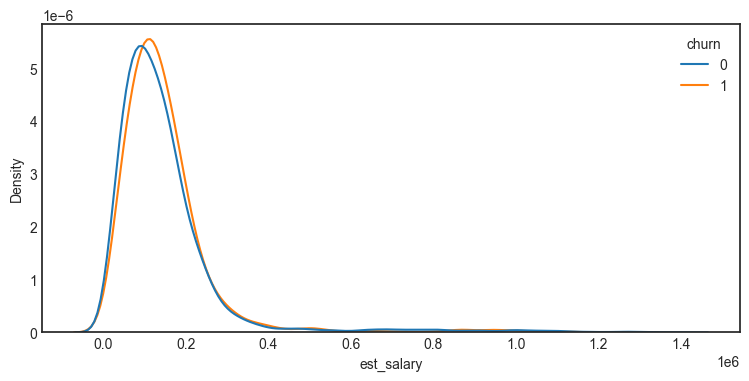

In [41]:
# создаем список показателей
columns_name = ['score',
 'age',
 'balance',
 'est_salary']

for i in columns_name:
    print('-'*25)
    print(f'Распределение оттоковых и неоттоковых клиентов по показателю {i}')
    plt.figure(figsize=(9,4))
    sns.kdeplot(data=new_data, x=i, hue='churn', common_norm=False)
    plt.show()


Из-за выбросов графики по балансу и доходу плохо читаются. Уберем выбросы для визуализации.

Распределение оттоковых и неоттоковых клиентов по показателю balance


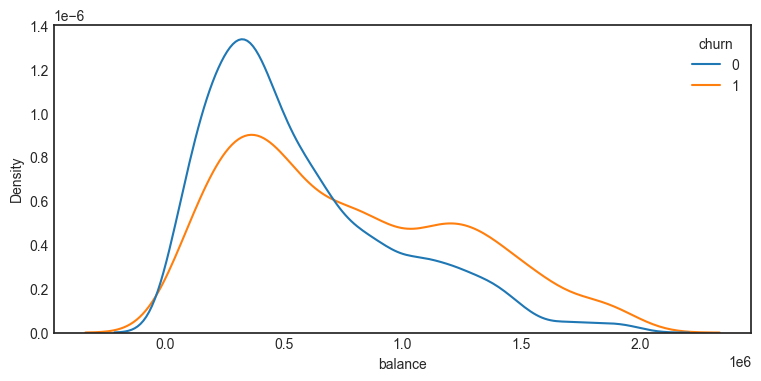

In [42]:
print(f'Распределение оттоковых и неоттоковых клиентов по показателю balance')
plt.figure(figsize=(9,4))
sns.kdeplot(data=new_data.loc[~(new_data['balance'] > 2000000)], x='balance', hue='churn', common_norm=False)
plt.show()

Распределение оттоковых и неоттоковых клиентов по показателю est_salary


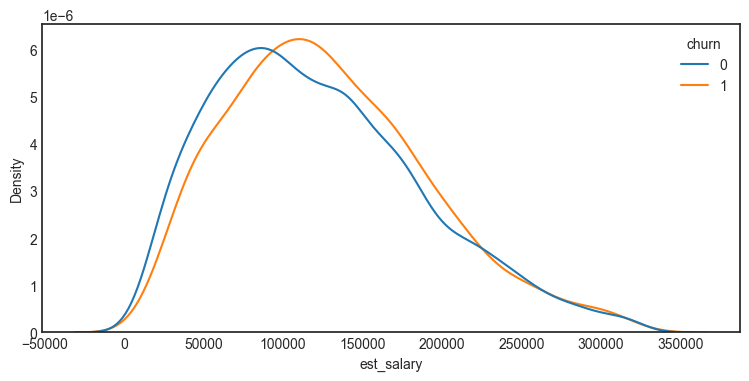

In [43]:
print(f'Распределение оттоковых и неоттоковых клиентов по показателю est_salary')
plt.figure(figsize=(9,4))
sns.kdeplot(data=new_data.query('est_salary <= 325000'), x='est_salary', hue='churn', common_norm=False)
plt.show()

Отток у следующих клиентов выше:
- с баллами скорринга от 820 до 950, 
- в возрасте от 25 до 35 или от 50 до 60 лет, 
- с балансом свыше 700 тыс.руб. 
- с доходом от 100 до 230 тыс.руб. 

Именно в этой логике мы и присвоим категории непрерывным показателям для проведения корреляционного анализа.

In [44]:
def score(row):
    if row['score']<820:
        score = 'до 820'
    elif row['score']<920:
        score = 'от 820 до 920'
    else:
        score = 'свыше 920'
    return score

new_data['score_cat'] = new_data.apply(score, axis=1)


def age(row):
    if row['age']<35:
        age = 'до 35'
    elif row['age']<50:
        age = 'от 35 до 50'
    elif row['age']<60:
        age = 'от 50 до 60'
    else:
        age = 'старше 60'
    return age

new_data['age_cat'] = new_data.apply(age, axis=1)


def balance(row):
    if row['balance']<750000:
        balance = 'до 750тр'
    elif row['balance']>=750000:
        balance = 'свыше 750тр'
    else:
        balance = 'нет данных'
    return balance

new_data['balance_cat'] = new_data.apply(balance, axis=1)

def est_salary(row):
    if row['est_salary']<100000:
        est_salary = 'до 100тр'
    elif row['est_salary']<200000:
        est_salary = 'от 100тр до 210тр'
    else:
        est_salary = 'свыше 210тр'
    return est_salary

new_data['est_salary_cat'] = new_data.apply(est_salary, axis=1)


new_data.head()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,...,gender_М,city_Ростов,city_Рыбинск,city_Ярославль,city,gender,score_cat,age_cat,balance_cat,est_salary_cat
0,183012,850.0,25.0,1,59214.82,2,0,1,75719.14,1,...,0,0,1,0,Рыбинск,Ж,от 820 до 920,до 35,до 750тр,до 100тр
1,146556,861.0,37.0,5,850594.33,3,1,0,86621.77,0,...,0,0,1,0,Рыбинск,Ж,от 820 до 920,от 35 до 50,свыше 750тр,до 100тр
2,120722,892.0,30.0,0,NaN,1,1,1,107683.34,0,...,0,0,1,0,Рыбинск,Ж,от 820 до 920,до 35,нет данных,от 100тр до 210тр
3,225363,866.0,51.0,5,1524746.26,2,0,1,174423.53,1,...,0,0,0,1,Ярославль,Ж,от 820 до 920,от 50 до 60,свыше 750тр,от 100тр до 210тр
4,157978,730.0,34.0,5,174.00,1,1,0,67353.16,1,...,1,0,0,1,Ярославль,М,до 820,до 35,до 750тр,до 100тр


In [45]:
# создаем список показателей
columns_name = ['score_cat',
 'age_cat',
 'balance_cat',
 'est_salary_cat']

for i in columns_name:
    print('-'*25)
    print(f'Отток и общее количество клиентов в разбивке по показателю {i}')
    new_data_i = new_data.pivot_table(index=i, values='churn', aggfunc='mean').reset_index()
    new_data_ii = new_data[i].value_counts().reset_index()
    new_data_ii.columns = [i, 'count']
    new_data_i = new_data_i.merge(new_data_ii, on=i).set_index(i)
 
    display(new_data_i.style.background_gradient('coolwarm'))

-------------------------
Отток и общее количество клиентов в разбивке по показателю score_cat


,churn,count
score_cat,,
до 820,0.107431,3351
от 820 до 920,0.232465,5261
свыше 920,0.172667,1361


-------------------------
Отток и общее количество клиентов в разбивке по показателю age_cat


,churn,count
age_cat,,
до 35,0.214261,2903
от 35 до 50,0.155035,4270
от 50 до 60,0.270000,1600
старше 60,0.085000,1200


-------------------------
Отток и общее количество клиентов в разбивке по показателю balance_cat


,churn,count
balance_cat,,
до 750тр,0.173173,4995
нет данных,0.005268,2278
свыше 750тр,0.348519,2700


-------------------------
Отток и общее количество клиентов в разбивке по показателю est_salary_cat


,churn,count
est_salary_cat,,
до 100тр,0.159021,3924
от 100тр до 210тр,0.203579,4303
свыше 210тр,0.182131,1746


Высокий отток показывают следующие категории по показателям:
- клиенты со скоринговым баллом от 820 до 920
- клиенты в возрасте до 35 и от 50 до 60 лет
- клиенты с балансом свыше 750 000 рублей
- клиенты с доходом от 100 000 рублей до 210 000 рублей.

### Корреляционный анализ

Построим матрицу корреляций.

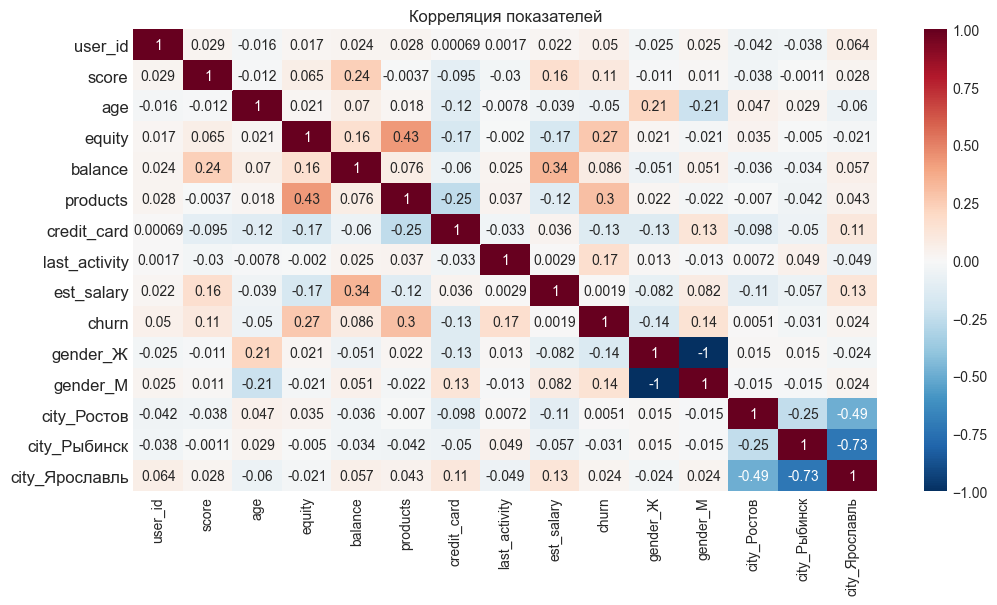

In [46]:
plt.figure(figsize=(12,6))
sns.heatmap(new_data.corr(),
            cmap='RdBu_r', # задаём цветовую схему 
            annot=True, # рисуем значения внутри ячеек 
            vmin=-1, vmax=1) # указываем начало цветовых кодов от -1 до 1.
plt.title('Корреляция показателей', fontsize=12)
plt.yticks(fontsize=12, rotation=360)
plt.show()

По матрице корреляций видно, что наибольшая корреляция (хотя сама по себе очень слабая) у оттока есть с оценкой собственности, балансом и количеством продуктов. При этом все три показателя коррелируют между собой. Также можно отметить корреляцию количества продуктов с балансом и оценкой стоимости, из чего напрашивается вывод о росте количества продуктов с уровнем благосостояния клиента. Обеспеченные люди используют кредитные продукты не для того, чтобы обеспечить свои базовые потребности, а как финансовый инструмент в сочетании с дебетовыми продуктами. А значит, что с ростом количества продуктов растет процент дебетовых продуктов в портфеле клиента.

Можно сказать, что больше корреляции у оттока с другими покзателями нет.

Тогда рассмотрим отдельно интересующие нас взаимосвязи.

Поскольку мужчины и женщины показали противоположную склонность к оттоку, начнем с рассмотрения пола в сочетании с остальными факторами, чтобы понять всегда ли женщины не планируют уходить из банка.

-------------------------
gender и equity


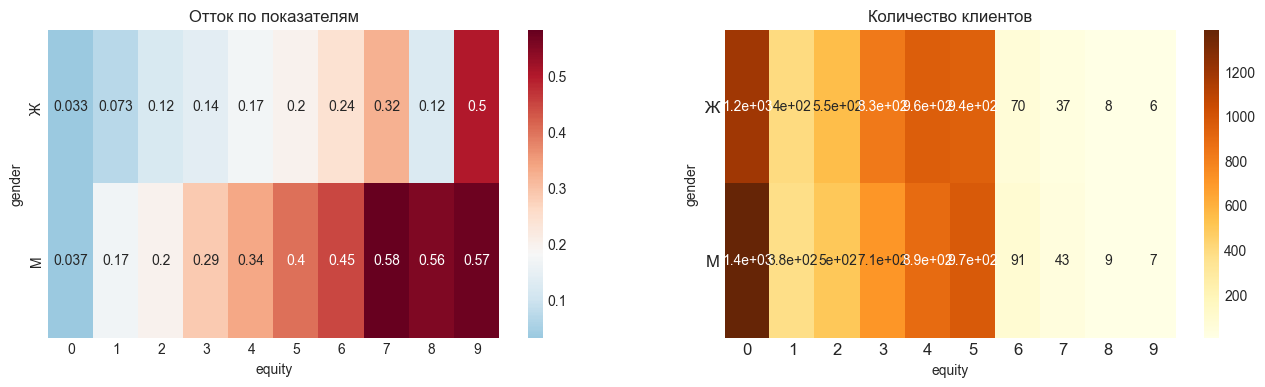

-------------------------
gender и products


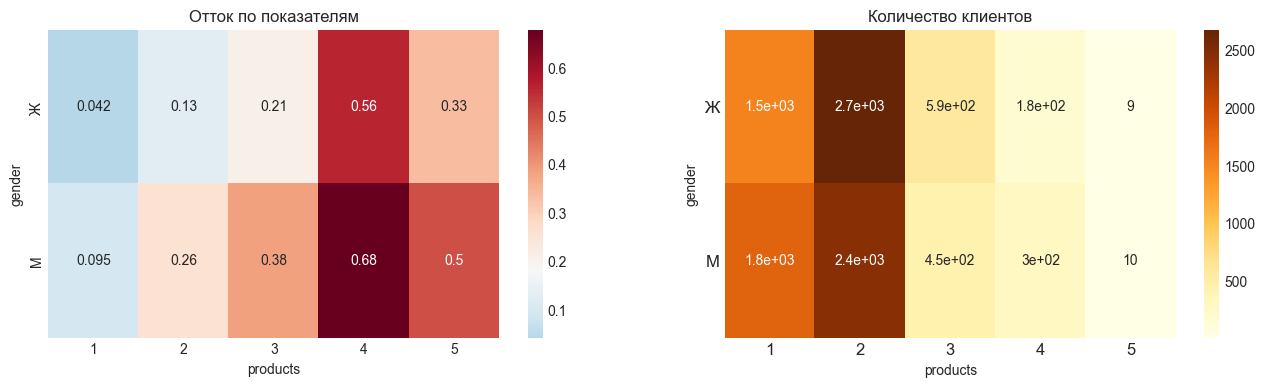

-------------------------
gender и credit_card


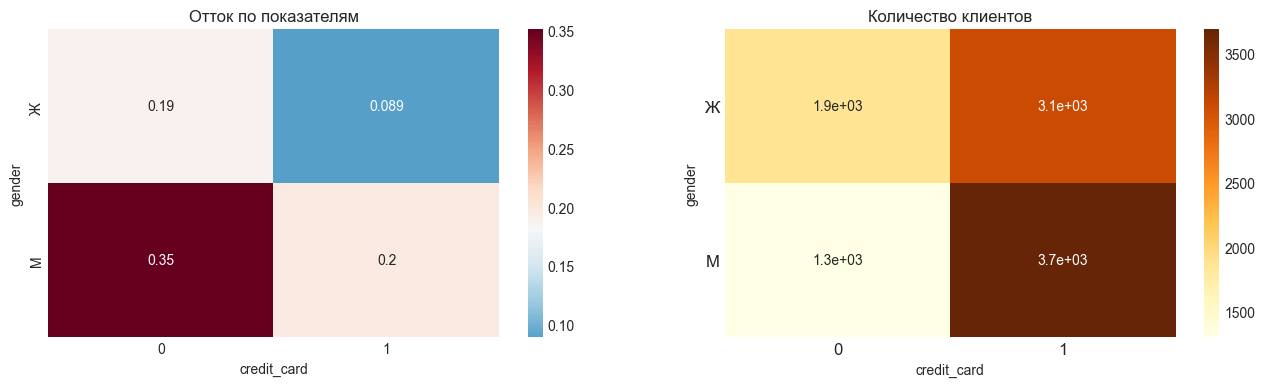

-------------------------
gender и last_activity


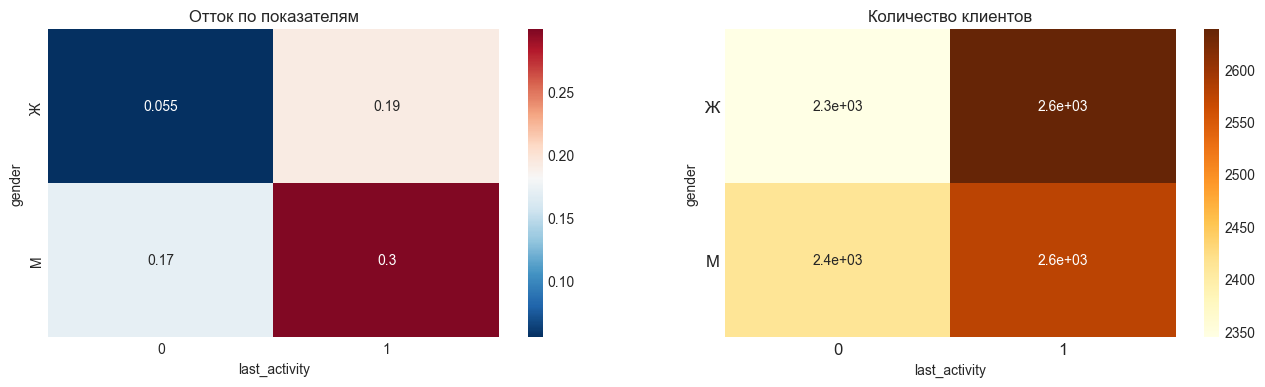

-------------------------
gender и score_cat


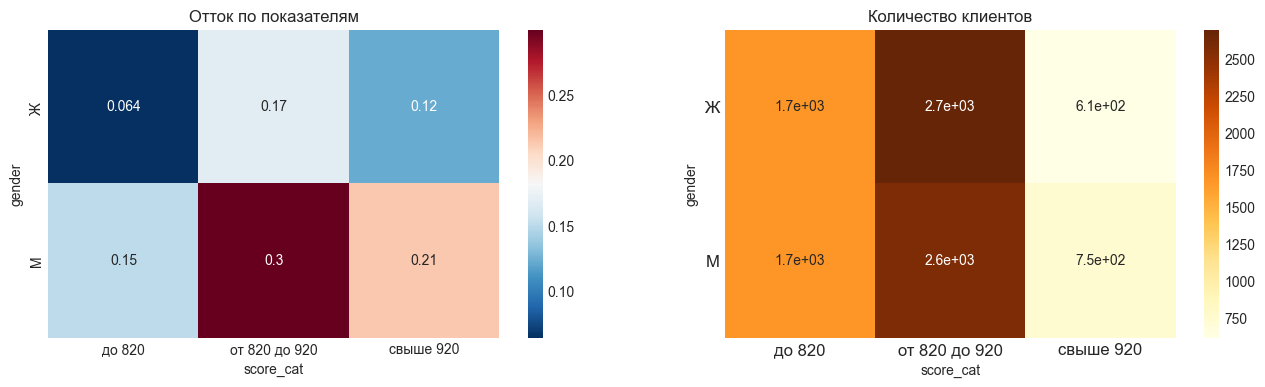

-------------------------
gender и age_cat


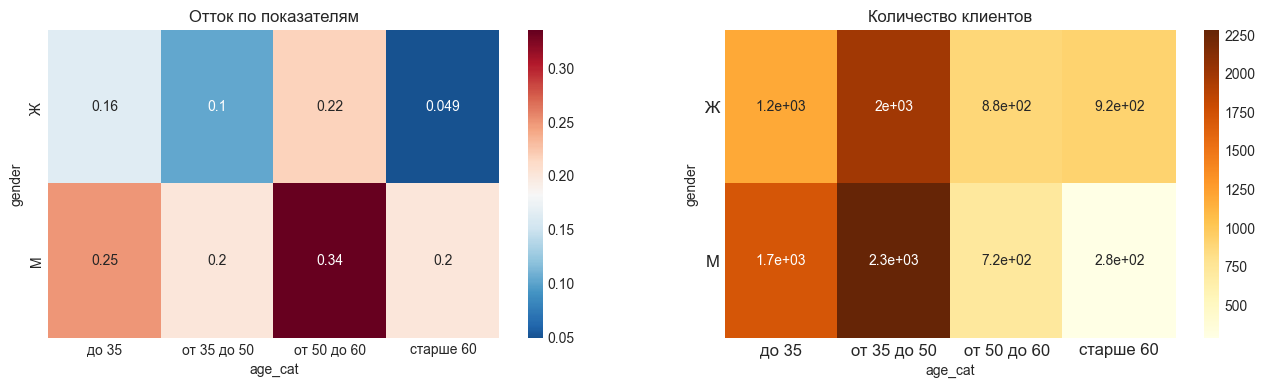

-------------------------
gender и balance_cat


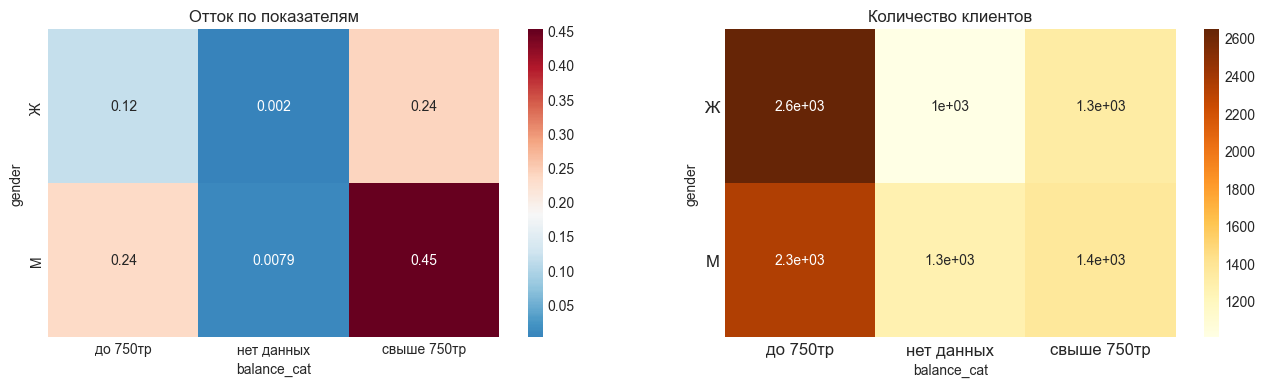

-------------------------
gender и est_salary_cat


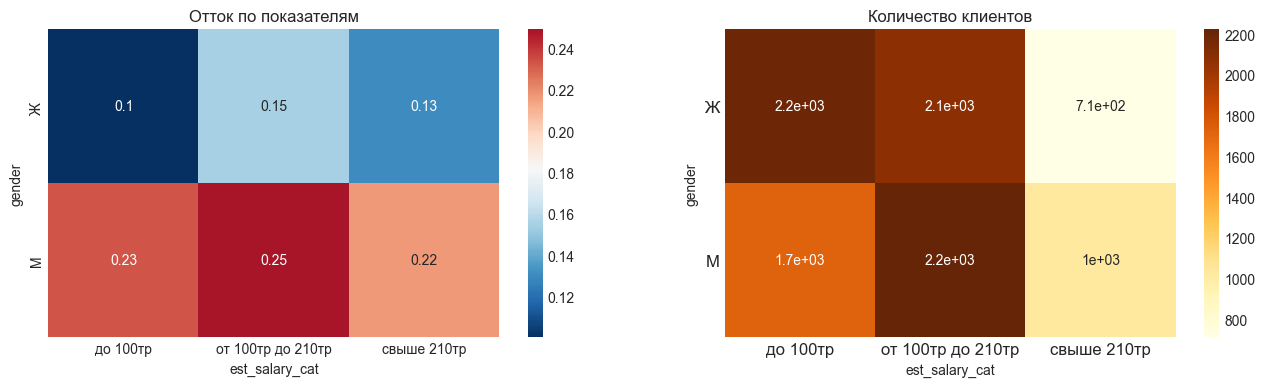

In [47]:
# проверяемый параметр
j = 'gender'

# с какими параметрами проверяем
columns = [ 'equity',
 'products',
 'credit_card',
 'last_activity',
 'gender',
 'score_cat',
 'age_cat',
 'balance_cat',
 'est_salary_cat']

data_cp = new_data.copy()

# пишем функцию для проверки оттока
def churn_param(j, columns, data_cp):
    for i in columns:
        
        if i==j:
            pass
        else:
            print('-'*25)
            print(f'{j} и {i}')
            dfj_1 = data_cp.pivot_table(index=j, columns=i, values='churn', aggfunc='mean')
            dfj_2 = data_cp.pivot_table(index=j, columns=i, values='user_id', aggfunc='count')
        
            fig, axes = plt.subplots(1, 2, figsize=(16,4))
            heatmap_1 = sns.heatmap(dfj_1,
            cmap='RdBu_r', # задаём цветовую схему 
            annot=True, # рисуем значения внутри ячеек 
            center=0.182, ax=axes[0]) 
            heatmap_1.axes.set_title('Отток по показателям', fontsize=12)
            plt.xticks(fontsize=12, rotation=360)
            plt.yticks(fontsize=12, rotation=270)
                
            heatmap_2 = sns.heatmap(dfj_2,
            cmap='YlOrBr', # задаём цветовую схему 
            annot=True, ax=axes[1]) # рисуем значения внутри ячеек 
          
            heatmap_2.axes.set_title(f'Количество клиентов', fontsize=12)
            plt.yticks(fontsize=12, rotation=360)
            plt.show()    

churn_param(j, columns, data_cp)

**gender и equity** У женщин показатель оттока превышает средний больше чем на 5% только при оценке собственности от 6 и выше, но таких клиентов меньше 300, поэтому в отдельную группу выводить совокупность этих факторов не будем. У мужчин показатель оттока выше среднего при оценке 3 и выше. При нулевой оценке собственности ни мужчины, ни женщины не склонны к оттоку. Вот они кредитные продукты, в частности ипотека.

**gender и products** Мужчины уже при двух продуктах имеют отток выше среднего, и чем больше продуктов, тем выше отток (а это около 3000 человек по 2-4 продуктам). Женщины же чаще среднего уходят из банка только при 4-х продуктах (но их только 180 человек). Вероятно, это связано со структурой портфеля: у женщин больше кредитных продуктов, чем у мужчин.

**gender и credit_card** Интересно, но женщины с кредиткой не уходят. Мужчины же без кредитки, наоборот, уходят почти в два раза чаще, чем в среднем по банку.

**gender и last_activity** Неактивные клиенты уходят не чаще, чем в среднем по банку, но активные мужчины уходят в полтора раза чаще, чем в среднем. 

**gender и score_cat** Уходить склонны только мужчины со скоринговым баллом от 820 до 920.

**gender и age_cat** Женщины старше 60 лет не склонны менять банк, склонны же мужчины до 35 и от 50 до 60 лет.

**gender и balance_cat** Пользователи кредитных продуктов (нет данных по балансу) банк не меняют. Мужчины, имеющие сумму на балансе уходят чаще среднего, женщины уходят чаще среднего только при сумме на балансе свыше 750 тыс.руб. Другими словами, клиенты уходят чаще среднего при балансе свыше 750 тыс.руб.

**gender и est_salary_cat** На решение женщин покинуть банк доход не влияет, у мужчин же только при доходе свыше 210 тыс.руб. показатель оттока превышает средний меньше чем на 5%, при доходе ниже мужчины уходят чаще.

Женщины уходят чаще среднего только при балансе свыше 750 тыс.руб. В других случаях предпочитают не менять банк.

Мужчины остаются чаще среднего при оценке собственности до 2 включительно, если у них только один продукт (явно кредитный), если они не активны, при скоринговом балле до 820. Показатель оттока у мужчин особенно выоск если: нет кредитки, больше одного продукта, он активен, в возрасте до 35 или от 50 до 60 лет, имеет баланс на карте, при любом доходе (особенно до 210 тыс.руб.)

Женщины больше склонны к кредитным продуктам и пассивности, мужчины же стараются обходится без кредитов и ищут лучшие условия по депозитам, но видимо с 35 до 50 у них ипотека, а после 60 и при доходе в 210 тыс.руб. можно немного расслабиться.


Посмотрим на показатель оттока по балансу в разрезе некоторых показателей. 

-------------------------
balance_cat и equity


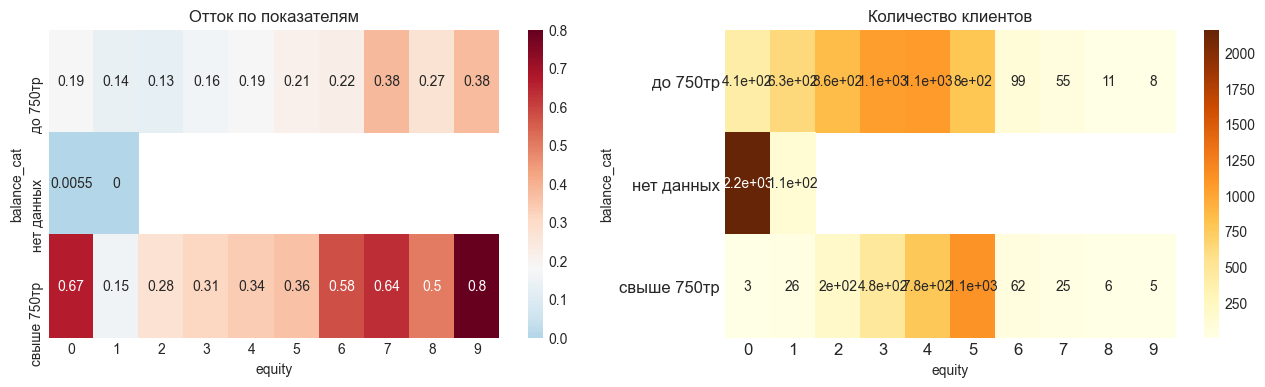

-------------------------
balance_cat и products


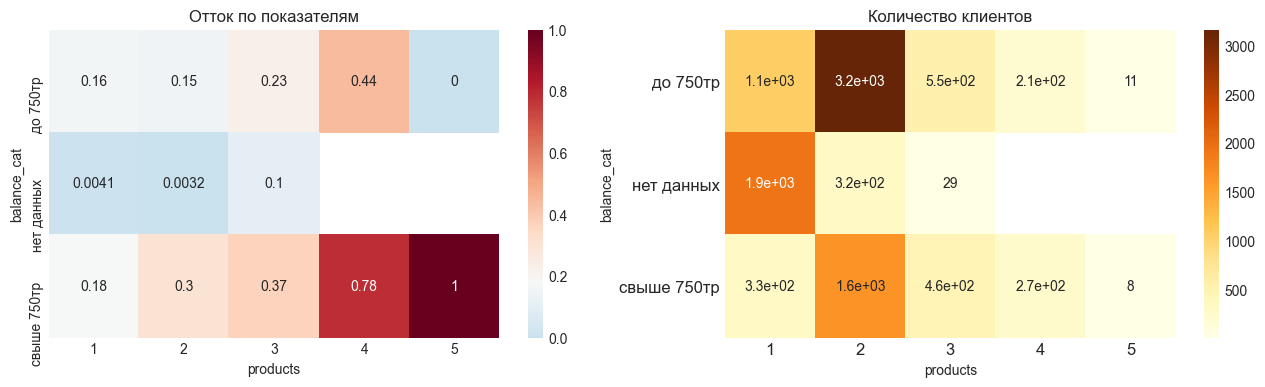

-------------------------
balance_cat и credit_card


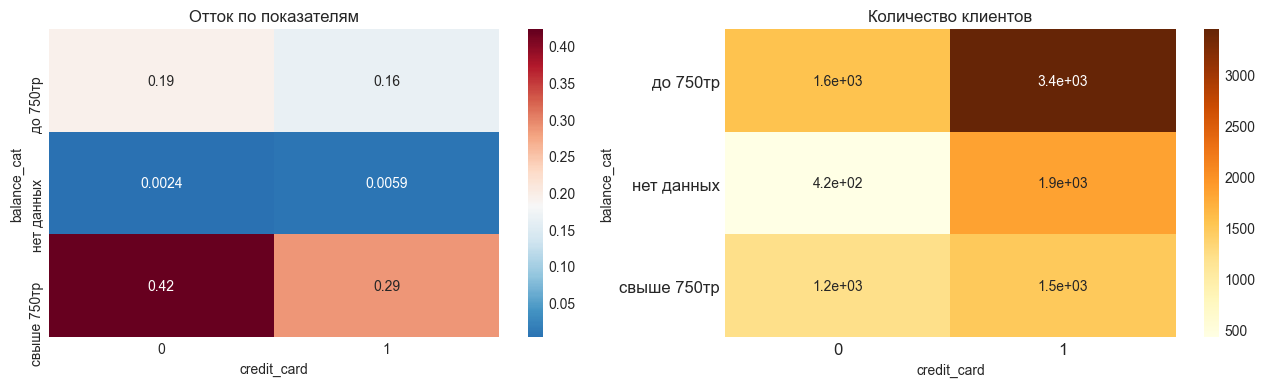

-------------------------
balance_cat и last_activity


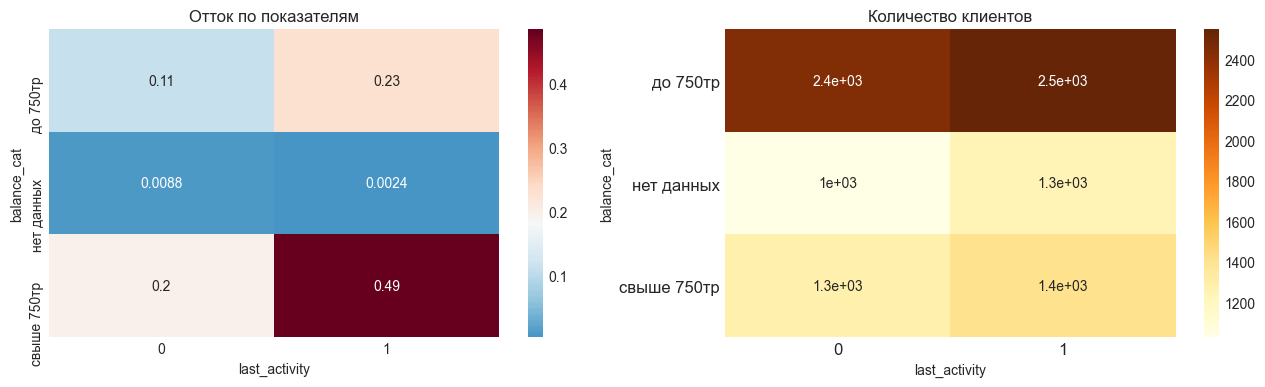

-------------------------
balance_cat и age_cat


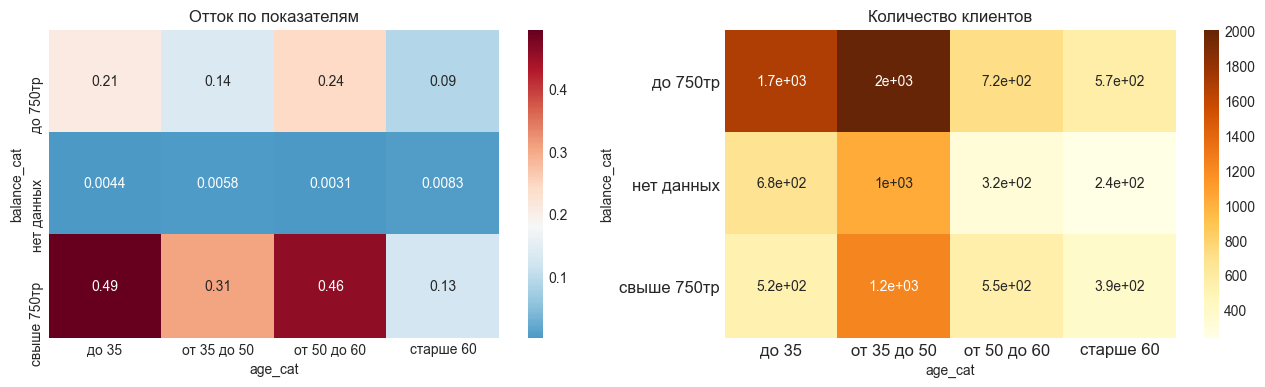

In [48]:
# проверяемый параметр
j = 'balance_cat'

# с какими параметрами проверяем
columns = [ 'equity',
 'products',
 'credit_card',
 'last_activity',
 'age_cat']

data_cp = new_data.copy()

churn_param(j, columns, data_cp)

Примечательно, что только кредитные продукты есть при собственности с оценкой 0 или 1 балл. В остальном неожиданностей нет.

Узнаем, что с оттоком по продуктам по показателям.

-------------------------
products и equity


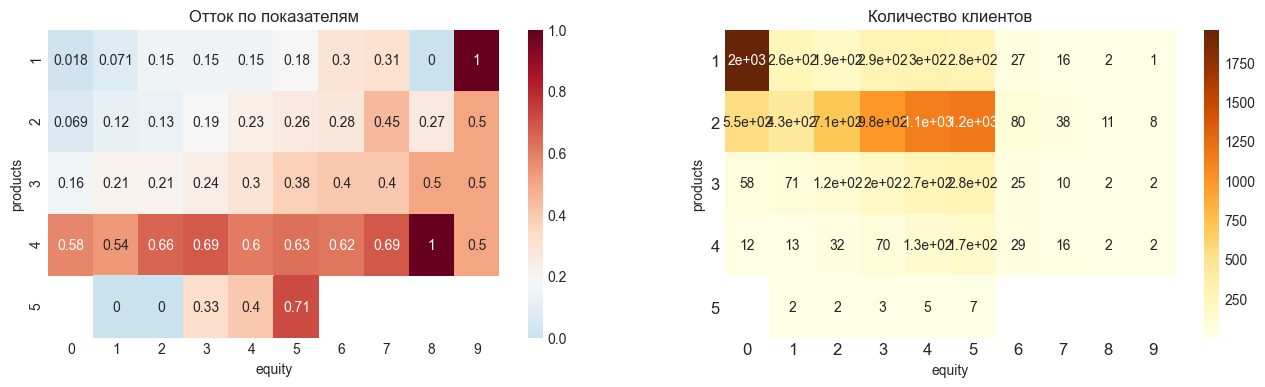

-------------------------
products и credit_card


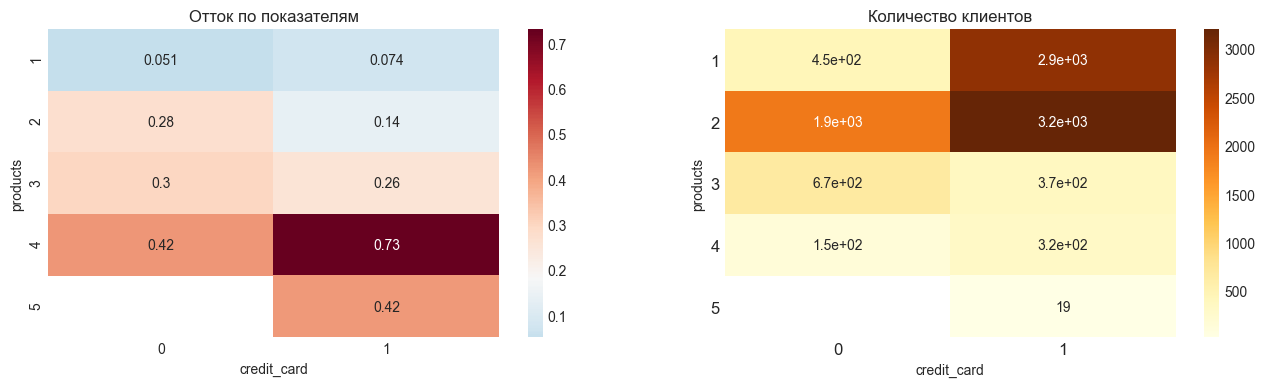

-------------------------
products и last_activity


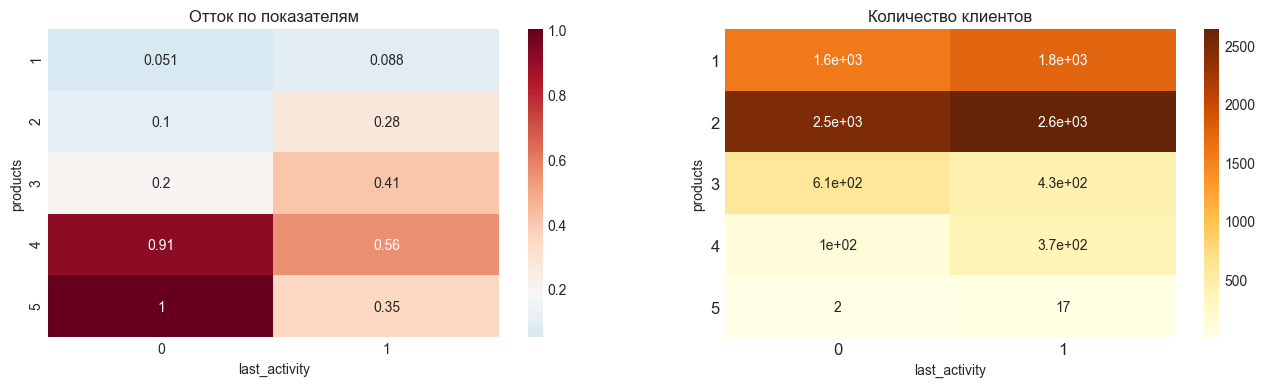

-------------------------
products и score_cat


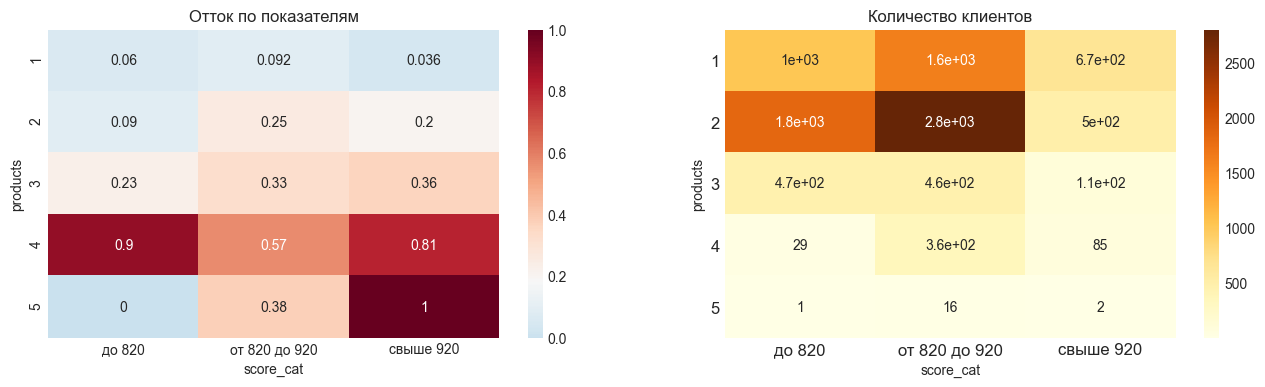

-------------------------
products и age_cat


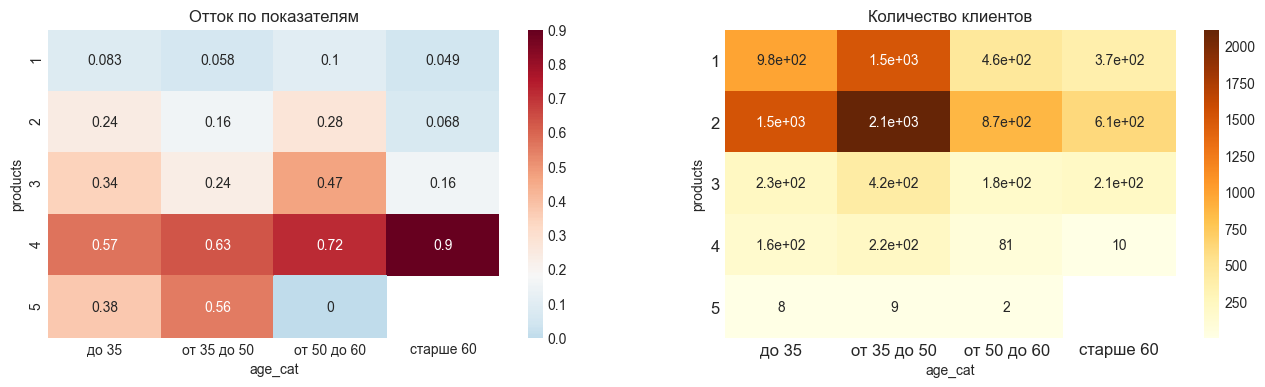

-------------------------
products и est_salary_cat


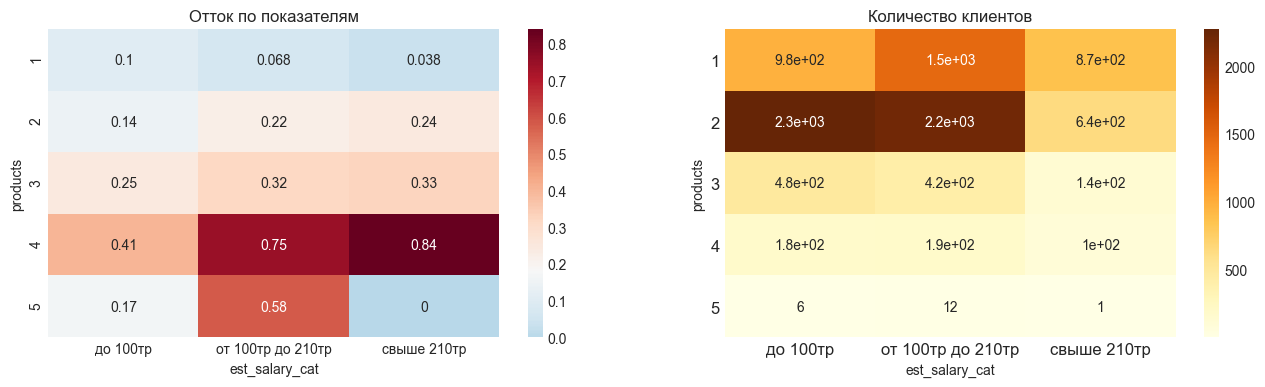

In [49]:
# проверяемый параметр
j = 'products'

# с какими параметрами проверяем
columns = [ 'equity',
 'credit_card',
 'last_activity',
 'score_cat',
 'age_cat',
 'est_salary_cat']

data_cp = new_data.copy()

churn_param(j, columns, data_cp)

Во всех разрезах показатель оттока у держателей четырех продуктов значительно выше, чем в среднем по банку. Пользователи трех продуктов в зоне риска (только люди старше 60 имеют показатель оттока ниже среднего. 2 продукта без кредитной карты тоже оттекают чаще среднего. И только с одним продуктом все в порядке, там в основном кредиты. 

Теперь посмотрим, как влияет на отток возраст мужчин в разрезах.

-------------------------
age_cat и equity


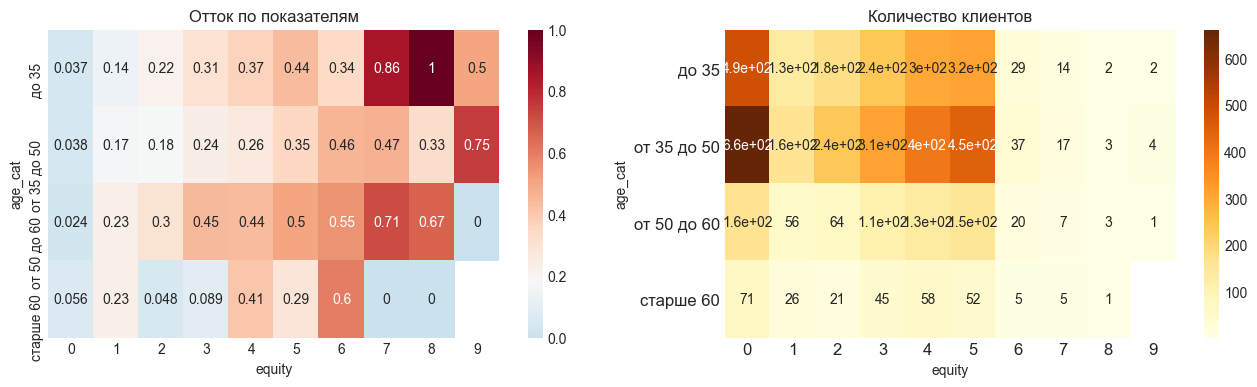

-------------------------
age_cat и products


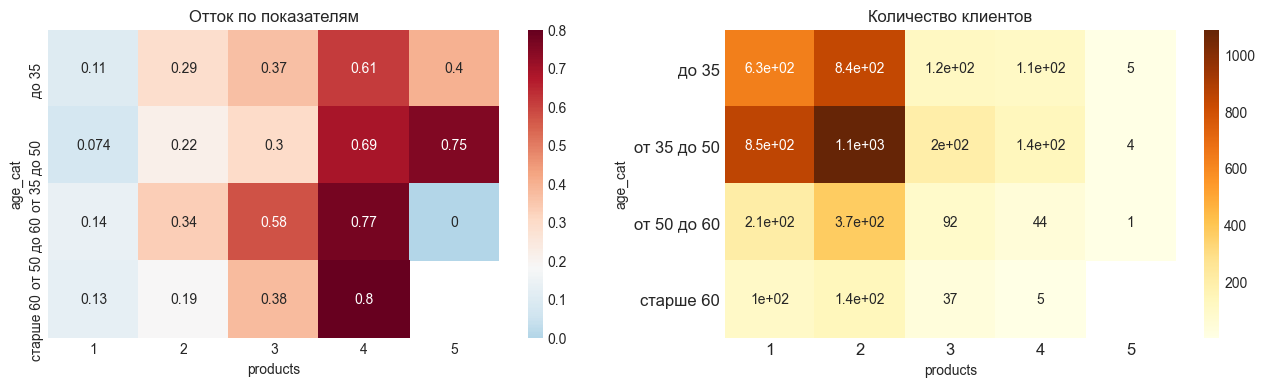

-------------------------
age_cat и last_activity


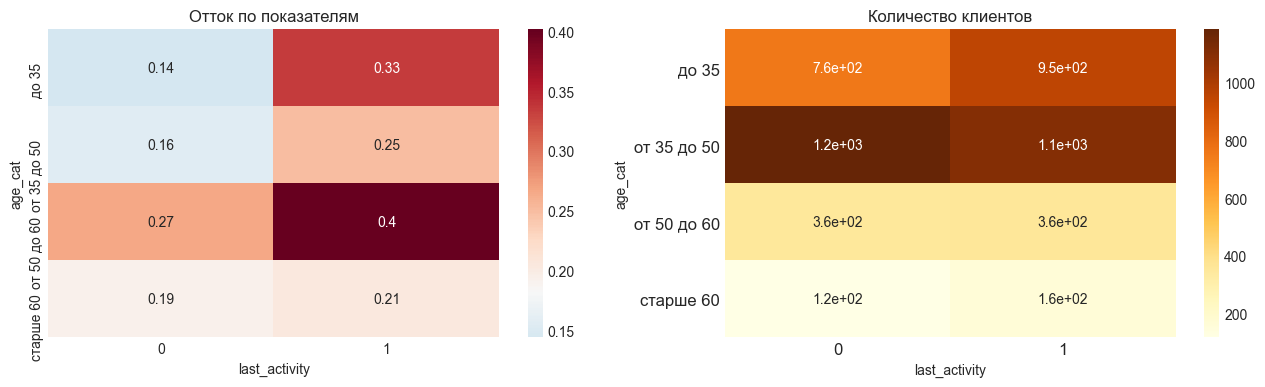

-------------------------
age_cat и balance_cat


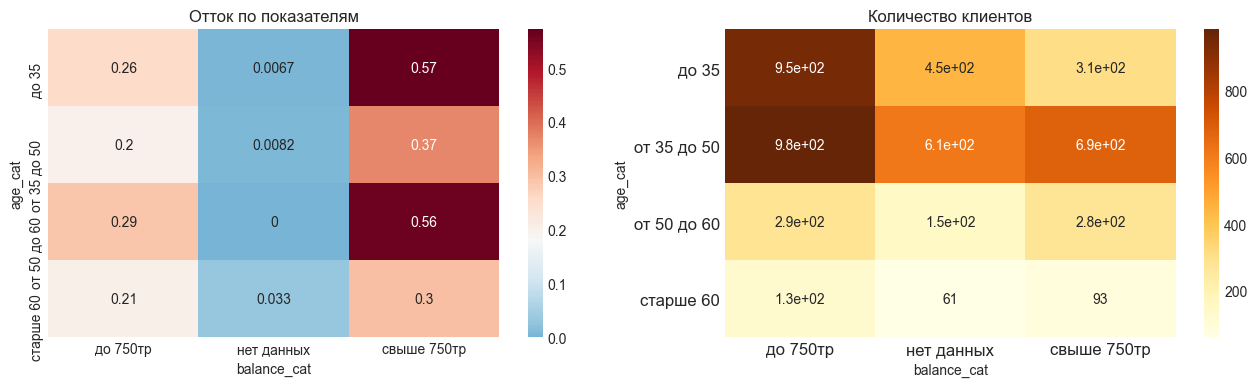

-------------------------
age_cat и est_salary_cat


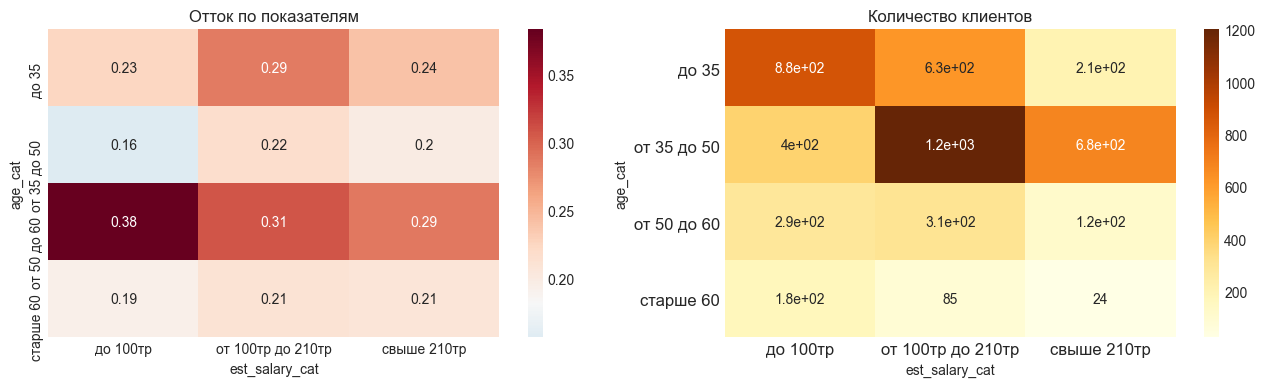

In [50]:
# проверяемый параметр
j = 'age_cat'

# с какими параметрами проверяем
columns = [ 'equity',
 'products',
 'last_activity',
 'balance_cat',
 'est_salary_cat']

data_cp = new_data.query('gender == "М"').copy()

churn_param(j, columns, data_cp)

Мужчины от 35 до 50 завязаны на ипотеку, о чем говорит оценка собственности (до 2х баллов включительно отток ниже среднего) и доход (только мужчины с доходом до 100 тыс.руб. уходят реже среднего).

Интересно, что из 150 мужчин от 50 до 60 без суммы на балансе никто не уходит. 

А что с женщинами?

-------------------------
age_cat и equity


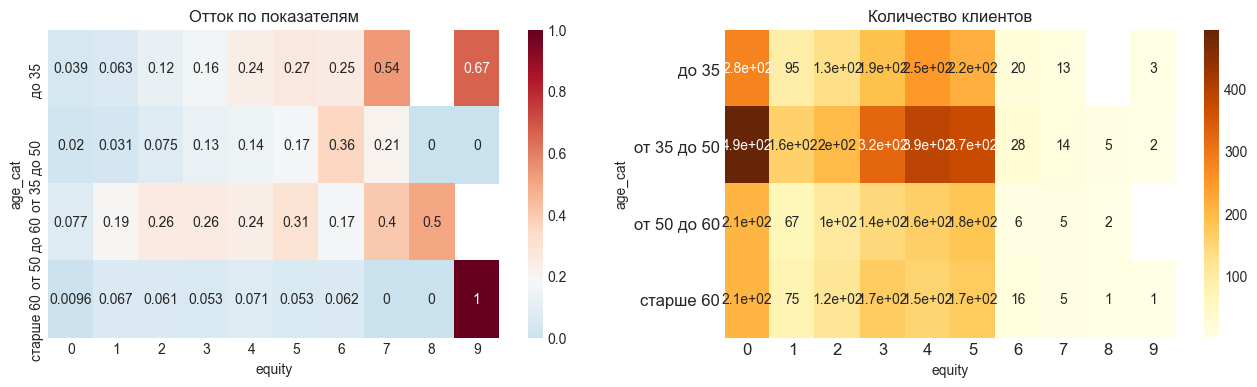

-------------------------
age_cat и products


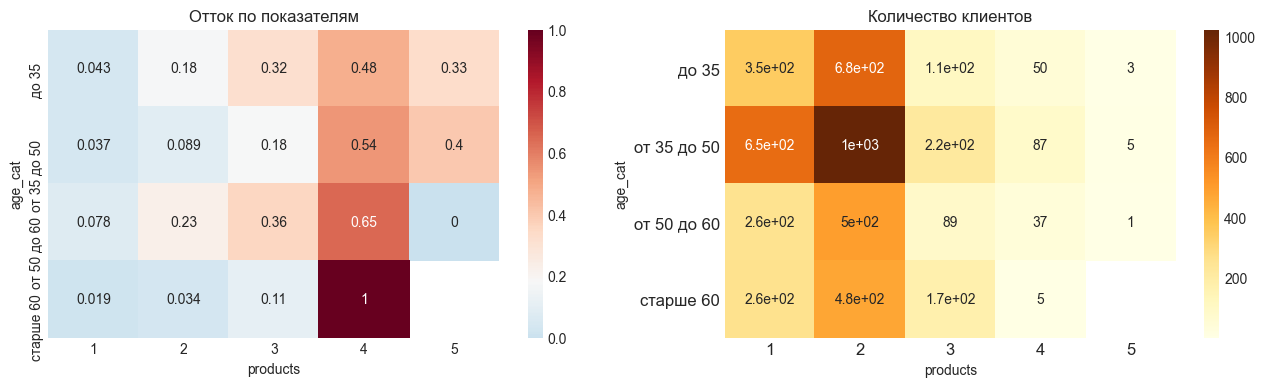

-------------------------
age_cat и last_activity


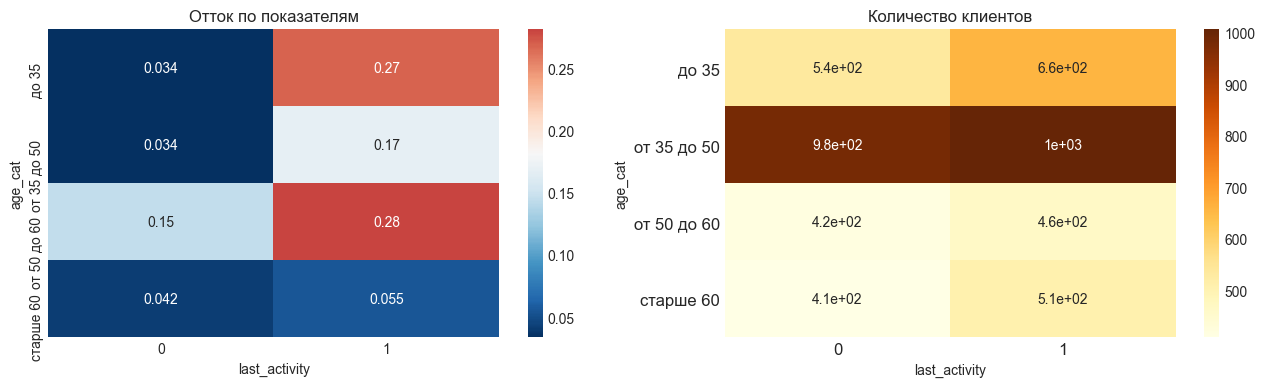

-------------------------
age_cat и balance_cat


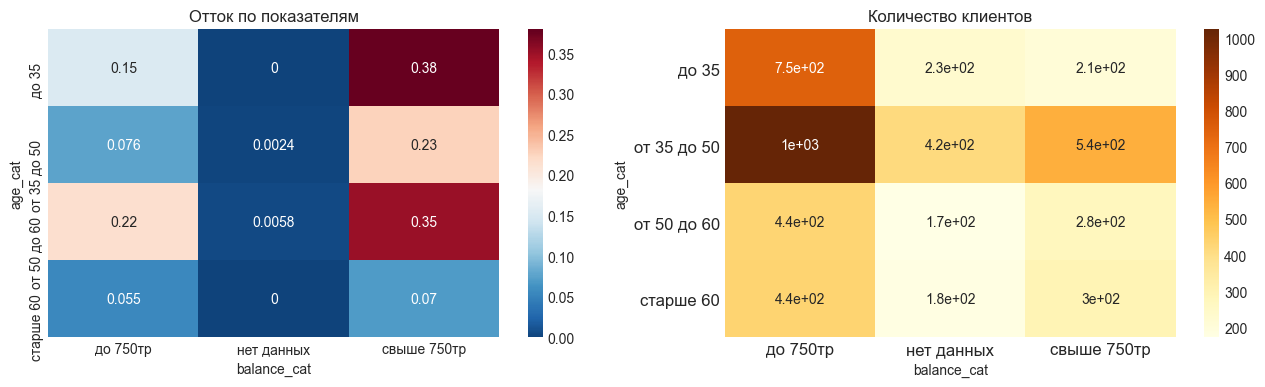

-------------------------
age_cat и est_salary_cat


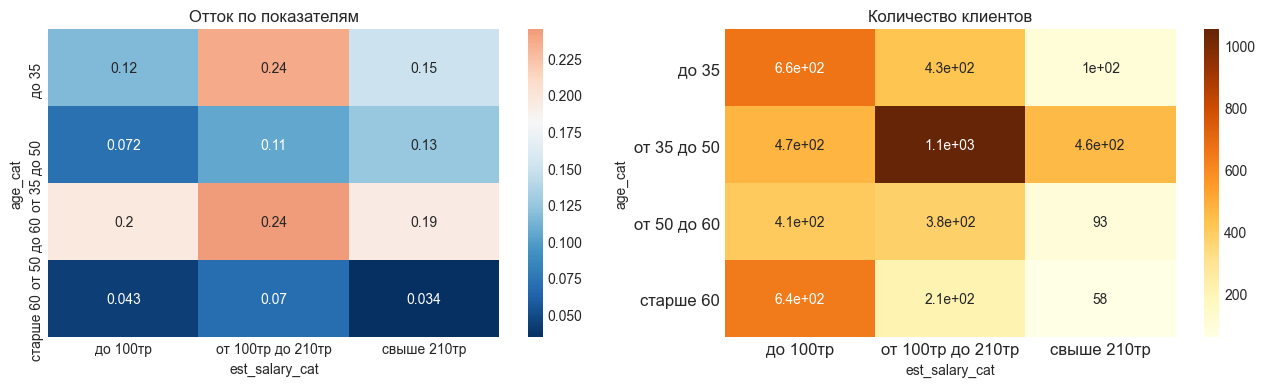

In [51]:
# проверяемый параметр
j = 'age_cat'

# с какими параметрами проверяем
columns = [ 'equity',
 'products',
 'last_activity',
 'balance_cat',
 'est_salary_cat']

data_cp = new_data.query('gender == "Ж"').copy()

churn_param(j, columns, data_cp)

До 50 лет больше мужчин, после - женщин. 
Женщины старше 60 практически не покидают банк даже при балансе свыше 750 тыс.руб.

___
Больше всего клиентов имеют два продукта. Затем идут клиенты: с одним продуктом, с тремя и с четырьмя.

С ростом количества продуктов растет благосостояние людей и доля дебетовых продуктов. Клиенты с одним продуктом имеют самый высокий медианный доход и нулевой балл по оценке имущества (с ростом продуктов этот балл растет), что говорит о большом проценте клиентов с ипотекой. К тому же среди всех клиентов одного продукта только 3,1% имеют дебетовые продукты.

Одиним и четырьмя продуктами пользуются больше мужчин, двумя и тремя - женщины.

У пользователей четырьмя продуктами наблюдается повышенная активность и отток.

У мужчин показатель оттока выше среднего, у женщин - ниже. Чем состоятельнее клиент (больше продуктов, выше оценка собственности, баланс), тем выше показаетль оттока. Клиенты только с кредитными продуктами практически не уходят. Значит у нас неконкурентные дебетовые программы.

## Проверка статистических гипотез

### Гипотеза о различии возраста клиентов с одним и двумя продуктами

Проверим гипотезу различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

Сформулируем нулевую и альтернативную гипотезы.

**Нулевая гипотеза:** Средний возраст клиентов с одним и возраст клиентов с двумя продуктами одинаковый (формулируем исходя из равенства).

**Альтернативная гипотеза:** Средний возраст клиентов с одним и возраст клиентов с двумя продуктами разный (противоположно нулевой гипотезе).

В данном случае мы проверяем гипотезу о равенстве средних (возрастов клиентов), поэтому используем t-тест. У нас две независимые выборки, и мы проверяем нулевую гипотезу о равенстве двух средних генеральных совокупностей друг другу. Поскольку нас не интересует, выше ли возраст в группе с двумя продуктами, чем с одним, или ниже, а важно лишь различиаются они или нет, мы будем использовать двусторонний двухвыборочный t-тест. Уровень статистической значимости зададим в 5%. 

Поскольку t-тест требует нормального распределения средних выборочных, проверим нормальность визуализировав распределение средних выборочных.

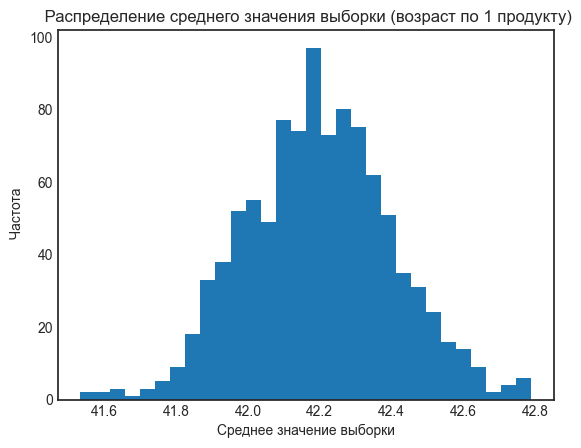

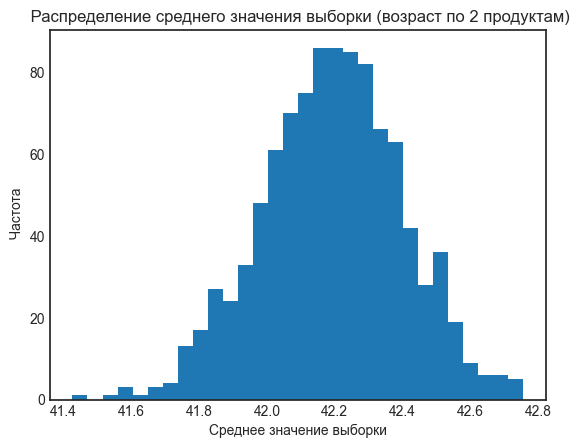

In [52]:
# создаем переменные с возрастами клиентов с одним и с двумя продуктами
new_data_h1_1 = new_data.loc[data['products']==1, 'age']
new_data_h1_2 = new_data.loc[data['products']==2, 'age']

# Функция для создания выборочного распределения среднего значения 
def sampling_distribution ( population , sample_size , n_samples ) : 
    sample_means = [ ] 
    for _ in range ( n_samples ) : 
        sample = population.sample(frac=1, replace=True)
        sample_means.append ( np.mean ( sample ) ) 
    return sample_means   
    

# Создать выборочное распределение среднего значения 
sample_means_h1_1 = sampling_distribution ( new_data_h1_1 , sample_size = 30 , n_samples = 1000 )
sample_means_h1_2 = sampling_distribution ( new_data_h1_1 , sample_size = 30 , n_samples = 1000 )

# Построить график распределения выборки 
plt.hist ( sample_means_h1_1 , bins = 30) 
plt.xlabel ( ' Среднее значение выборки ' ) 
plt.ylabel ( ' Частота' ) 
plt.title ( ' Распределение среднего значения выборки (возраст по 1 продукту)' ) 
plt.show ( )

# Построить график распределения выборки 
plt.hist ( sample_means_h1_2 , bins = 30) 
plt.xlabel ( ' Среднее значение выборки ' ) 
plt.ylabel ( ' Частота' ) 
plt.title ( ' Распределение среднего значения выборки (возраст по 2 продуктам)' ) 
plt.show ( )

Средние выборочные распределены нормально. Можем переходить к тесту.

In [53]:
# устанавливаем уровень статистической значимости
alpha = 0.05

# Тест двусторонний, используем аргумент 'two-sided'
# equal_var=False, т.к. мы не знаем размеры выборок и их дисперсии
results = st.ttest_ind(new_data_h1_1, new_data_h1_2, alternative='two-sided', equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.03299080704232691
Отвергаем нулевую гипотезу


Данные дают достаточное основание отвергнуть нулевую гипотезу для выбранного уровня значимости в пользу альтернативной гипотезы. Значит, можно сделать вывод, что средний возраст у клиентов с одним и двумя продуктами разный.

### Гипотеза о различии частоты кредитов у мужчин и женщин

У нас есть гипотеза, что мужчины используют кредитные продукты чаще женщин. 

Сформулируем нулевую и альтернативную гипотезы.

**Нулевая гипотеза:** Доля мужчин и женщин с кредитными продуктами одинаковая.

**Альтернативная гипотеза:** Доля мужчин с кредитными продуктами больше доли женщин с кредитными продуктами.

Теперь мы проверяем гипотезу о равенстве долей (Чтобы ее проверить мы сравним доли мужчин с ипотекой от общего количества мужчин с долей женщин от общего количества женщин), поэтому используем z-тест для пропорций. Поскольку тест односторонний, мы не будем ставить модуль у статистики и удваивать результат.

Подготовим данные. Считаем, что клиент с кредитными продуктами не имеет суммы на балансе и/или имеет кредитную карту.

In [54]:
# нет данных по балансу
new_data['balance_code'] = new_data['balance'].isna().replace(False,0).replace(True,1)

new_data['credit_code'] = new_data['balance_code'] + new_data['credit_card']
new_data['credit_code'] = new_data['credit_code'].replace(2,1)

# женщины с кредитом
new_data['h2_f'] = new_data['gender_Ж'] + new_data['credit_code']
new_data['h2_f'] = new_data['h2_f'].replace(1,0)
new_data['h2_f'] = new_data['h2_f'].replace(2,1)

# мужчины с кредитом
new_data['h2_m'] = new_data['gender_М'] + new_data['credit_code'] 
new_data['h2_m'] = new_data['h2_m'].replace(1,0)
new_data['h2_m'] = new_data['h2_m'].replace(2,1)
new_data.head()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,...,city,gender,score_cat,age_cat,balance_cat,est_salary_cat,balance_code,credit_code,h2_f,h2_m
0,183012,850.0,25.0,1,59214.82,2,0,1,75719.14,1,...,Рыбинск,Ж,от 820 до 920,до 35,до 750тр,до 100тр,0,0,0,0
1,146556,861.0,37.0,5,850594.33,3,1,0,86621.77,0,...,Рыбинск,Ж,от 820 до 920,от 35 до 50,свыше 750тр,до 100тр,0,1,1,0
2,120722,892.0,30.0,0,NaN,1,1,1,107683.34,0,...,Рыбинск,Ж,от 820 до 920,до 35,нет данных,от 100тр до 210тр,1,1,1,0
3,225363,866.0,51.0,5,1524746.26,2,0,1,174423.53,1,...,Ярославль,Ж,от 820 до 920,от 50 до 60,свыше 750тр,от 100тр до 210тр,0,0,0,0
4,157978,730.0,34.0,5,174.00,1,1,0,67353.16,1,...,Ярославль,М,до 820,до 35,до 750тр,до 100тр,0,1,0,1


Перейдем к проверке гипотезы.

In [55]:
alpha = 0.05

# пропорция кредитов у женщин:
p1 = new_data.loc[data['gender']== 'Ж', 'h2_f'].mean()

# пропорция кредитов у женщин:
p2 = new_data.loc[data['gender']== 'М', 'h2_m'].mean()

# пропорция успехов в комбинированном датасете:
p_combined = (new_data.loc[data['gender']== 'Ж', 'h2_f'].sum() + new_data.loc[data['gender']== 'М', 'h2_m'].sum()) / \
              (new_data['user_id'].count())

# разница пропорций в датасетах
difference = p2 - p1

trials_f = new_data.loc[data['gender']== 'Ж', 'h2_f'].count()  
trials_m = new_data.loc[data['gender']== 'М', 'h2_m'].count()
  
# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials_f + 1/trials_m))
                              
# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)
print('Женщины: ')
print(f'Количество клиентов: {trials_f},  Доля клиентов с кредитным продуктом: {round(p1,3)}')     
print('Мужчины: ')
print(f'Количество клиентов: {trials_m},  Доля клиентов с кредитным продуктом: {round(p2,3)}')
print('Разница между группами в долях клиентов с кредитным продуктом: ', round(difference, 3))
p_value = 1 - st.norm(0, 1).cdf(z_value)

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными') 

Женщины: 
Количество клиентов: 4982,  Доля клиентов с кредитным продуктом: 0.663
Мужчины: 
Количество клиентов: 4991,  Доля клиентов с кредитным продуктом: 0.782
Разница между группами в долях клиентов с кредитным продуктом:  0.119
p-значение:  0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница


Для дополнительной проверки применим к выборкам критерий Манна-Уитни. Он может указать есть ли разница в долях, без указания большей доли.

In [56]:
pvalue = st.mannwhitneyu(new_data.loc[data['gender']== 'Ж', 'h2_f'], new_data.loc[data['gender']== 'М', 'h2_m'])
print('p-значение: ', pvalue[1])
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными') 

p-значение:  1.9073068831120594e-40
Отвергаем нулевую гипотезу: между долями есть значимая разница


p-value по Манна-Уитни также показывает, что доли разные, но понять, какая доля больше по этому критерию мы не можем.

Разница в долях мужчин и женщин с кредитными продуктами в 0,119 (или 11,9 процентных пункта), она статистически значимая. 

У нас есть основания считать, что доля мужчин с кредитными продуктами больше доли женщин.

___
В результате проверки гипотез у нас есть основания считать, что разница в среднем возрасте (при заданном уровне стат.значимости) между держателями одного и двух продуктов есть, и что мужчины используют кредитные продукты чаще женщин.

## Показатели, которые нужно учесть при сегментации

Мы уже выяснили, что поведение мужчин и женщин сильно различается. Создадим сводную схему с важными различиями.

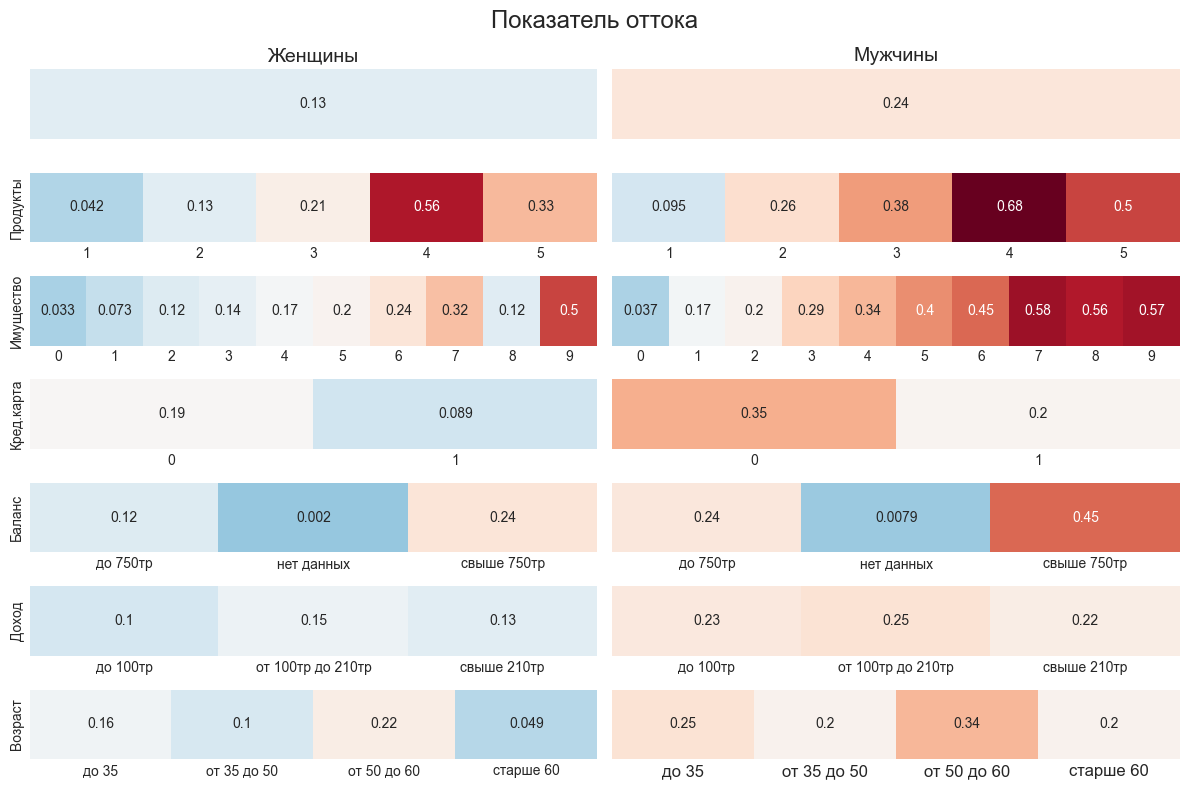

In [57]:
dfcp_f = new_data.loc[data['gender']== 'Ж'].pivot_table(index='gender', values='churn', aggfunc='mean')
dfcp_m = new_data.loc[data['gender']== 'М'].pivot_table(index='gender', values='churn', aggfunc='mean')

# функция для женщин
def heatmap_cpf(dfcp, i, j):
    heatmap_hcp = sns.heatmap(dfcp,
    cmap='RdBu_r', # задаём цветовую схему 
    annot=True, # рисуем значения внутри ячеек 
    center=0.182, vmin=0, vmax=0.65, ax=axes[i,0], cbar=None) 
    heatmap_hcp.set_ylabel(j)
    heatmap_hcp.set_yticks([])
    heatmap_hcp.set_xlabel('')
    plt.xticks(fontsize=12, rotation=360)

# функция для мужчин
def heatmap_cpm(dfcp, i):
    heatmap_hcp = sns.heatmap(dfcp,
    cmap='RdBu_r', # задаём цветовую схему 
    annot=True, # рисуем значения внутри ячеек 
    center=0.182, vmin=0, vmax=0.65, ax=axes[i,1], cbar=None) 
    heatmap_hcp.get_yaxis ().set_visible ( False )
    heatmap_hcp.set_xlabel('')
    plt.xticks(fontsize=12, rotation=360)

fig, axes = plt.subplots(7, 2, figsize=(12,8))
  
# строим график для женщин
heatmap_f = sns.heatmap(dfcp_f,
cmap='RdBu_r', annot=True, center=0.182, vmin=0, vmax=0.65, ax=axes[0,0], cbar=None) 
heatmap_f.get_yaxis ().set_visible ( False )
heatmap_f.get_xaxis ().set_visible ( False )
heatmap_f.axes.set_title('Женщины', fontsize=14)
        
# строим график для мужчин
heatmap_m = sns.heatmap(dfcp_m,
cmap='RdBu_r', annot=True, center=0.182, vmin=0, vmax=0.65, ax=axes[0,1], cbar=None) 
heatmap_m.get_yaxis ().set_visible ( False )
heatmap_m.get_xaxis ().set_visible ( False )
heatmap_m.axes.set_title('Мужчины', fontsize=14)

# строим график по продуктам
dfcp_f = new_data.loc[data['gender']== 'Ж'].pivot_table(index='gender', columns='products', values='churn', aggfunc='mean')
dfcp_m = new_data.loc[data['gender']== 'М'].pivot_table(index='gender', columns='products', values='churn', aggfunc='mean')

heatmap_cpf(dfcp_f, 1, 'Продукты')
heatmap_cpm(dfcp_m, 1)

# строим график по продуктам
dfcp_f = new_data.loc[data['gender']== 'Ж'].pivot_table(index='gender', columns='equity', values='churn', aggfunc='mean')
dfcp_m = new_data.loc[data['gender']== 'М'].pivot_table(index='gender', columns='equity', values='churn', aggfunc='mean')

heatmap_cpf(dfcp_f, 2, 'Имущество')
heatmap_cpm(dfcp_m, 2)

# строим график по кк
dfcp_f = new_data.loc[data['gender']== 'Ж'].pivot_table(index='gender', columns='credit_card', values='churn', aggfunc='mean')
dfcp_m = new_data.loc[data['gender']== 'М'].pivot_table(index='gender', columns='credit_card', values='churn', aggfunc='mean')

heatmap_cpf(dfcp_f, 3, 'Кред.карта')
heatmap_cpm(dfcp_m, 3)

# строим график по балансу
dfcp_f = new_data.loc[data['gender']== 'Ж'].pivot_table(index='gender', columns='balance_cat', values='churn', aggfunc='mean')
dfcp_m = new_data.loc[data['gender']== 'М'].pivot_table(index='gender', columns='balance_cat', values='churn', aggfunc='mean')

heatmap_cpf(dfcp_f, 4, 'Баланс')
heatmap_cpm(dfcp_m, 4)

# строим график по доходу
dfcp_f = new_data.loc[data['gender']== 'Ж'].pivot_table(index='gender', columns='est_salary_cat', values='churn', aggfunc='mean')
dfcp_m = new_data.loc[data['gender']== 'М'].pivot_table(index='gender', columns='est_salary_cat', values='churn', aggfunc='mean')

heatmap_cpf(dfcp_f, 5, 'Доход')
heatmap_cpm(dfcp_m, 5)

# строим график по возрасту
dfcp_f = new_data.loc[data['gender']== 'Ж'].pivot_table(index='gender', columns='age_cat', values='churn', aggfunc='mean')
dfcp_m = new_data.loc[data['gender']== 'М'].pivot_table(index='gender', columns='age_cat', values='churn', aggfunc='mean')

heatmap_cpf(dfcp_f, 6, 'Возраст')
heatmap_cpm(dfcp_m, 6)

plt.suptitle('Показатель оттока', fontsize='xx-large')
plt.tight_layout()
plt.show()       

Мужчины уходят из банка чаще женщин. Вероятно, женщины более эмоциональны и имеют приверженность бренду (банку), мужчины более рациональны и принимают решение о выборе банка на основе расчета выгоды. 

Кредиты в банке выгодны, или перекредитоваться в другом банке проблематично, поэтому клиенты только с кредитными продуктами уходят редко вне зависимости от пола. Клиенты покидают банк с ростом благосостояния, но мужчины делают это сразу после решения имущественного вопроса, женщины же ждут дольше. Только имея баланс свыше 750 тыс. руб. и/или 4 продукта, у женщин рациональность побеждает привязанность к банку. И даже здесь есть исключения: женщины старше 60 лет даже при балансе свыше 750 тыс. руб. остаются верны банку.

Исходя из вышесказанного можно выделить следующие категории клиентов по показателю оттока:
- a. Клиенты с четырьмя и более продуктами
- b. Клиенты с балансом свыше 750 тыс. руб. с 1-3 продуктами кроме женщин старше 60 лет
- c. Мужчины без кредитной карты с 2-3 продуктами в возрасте до 35 лет и от 50 до 60 лет и балансом до 750 тыс. руб.
- d. Мужчины с 1 продуктом в возрасте от 35 до 50 лет 
- e. Женщины, не попавшие в категории выше (1-3 продукта, баланс до 750 тыс.руб.,  баланс свыше 750 тыс.руб. старше 60 лет)
- f. Мужчины, не попавшие в категории выше (с 1 продуктом в возрасте до 35 лет и от 50 до 60 лет, с 2-3 продуктами в возрасте до 35 лет и от 50 до 60 лет с кредитной картой и балансом до 750 тыс.руб., с 2-3 продуктами в возрасте от 35 до 50 лет и балансом до 750 тыс.руб.)

## Сегментация на основе выбранных показателей

Технически выделим сегменты и посчитаем по ним показатель оттока и количество клиентов.
Нам важно, чтобы в категории было не меньше 300 человек с показателем оттока выше среднего более, чем на 5%.

**Категория "а"**

In [58]:
# создаем таблицу с категорией a. Клиенты с четырьмя и более продуктами
new_data_a = new_data.loc[new_data['products']>=4].copy()
# создаем рабочую таблицу без категории а
new_data_work = new_data.loc[new_data['products']<4].copy()

new_data_a_count = new_data_a['user_id'].count()
new_data_a_segment_churn = round(new_data_a['churn'].mean(),3)

print(f'Категория "a". Количество клиентов: {new_data_a_count}, Отток по категории: {new_data_a_segment_churn}')

Категория "a". Количество клиентов: 493, Отток по категории: 0.625


**Категория "b"**

In [59]:
# создаем таблицу с категорией b. Клиенты с балансом свыше 750 тыс. руб. с 1-3 продуктами кроме женщин старше 60 лет
new_data_b = new_data_work.loc[(new_data_work['balance']>= 750000) & ~((new_data_work['gender']== 'Ж') & (new_data_work['age_cat']== 'старше 60'))].copy()
# создаем рабочую таблицу без категории b
new_data_work = new_data_work.loc[~((new_data_work['balance']>= 750000) & ~((new_data_work['gender']== 'Ж') & (new_data_work['age_cat']== 'старше 60')))].copy()

new_data_b_count = new_data_b['user_id'].count()
new_data_b_segment_churn = round(new_data_b['churn'].mean(),3)

print(f'Категория "b". Количество клиентов: {new_data_b_count}, Отток по категории: {new_data_b_segment_churn}')

Категория "b". Количество клиентов: 2131, Отток по категории: 0.332


**Категория "c"**

In [60]:
# создаем таблицу с категорией c. Мужчины без кредитной карты с 2-3 продуктами 
#в возрасте до 35 лет и от 50 до 60 лет и балансом до 750 тыс. руб.

new_data_c = new_data_work.loc[(new_data_work['gender']=='М') \
                               & (new_data_work['credit_card']==0)  \
                               & (new_data_work['products']> 1)  \
                               &((new_data_work['age_cat']=='до 35') | (new_data_work['age_cat']=='от 50 до 60'))\
                              ].copy()
    
new_data_c_count = new_data_c['user_id'].count()
new_data_c_segment_churn = round(new_data_c['churn'].mean(),3)

print(f'Категория "c". Количество клиентов: {new_data_c_count}, Отток по категории: {new_data_c_segment_churn}')

Категория "c". Количество клиентов: 240, Отток по категории: 0.292


Отток показательный, но человек очень мало. Попробуем для категории 'с' убрать критерий по возрасту.

In [61]:
# создаем таблицу с категорией c1. Мужчины без кредитной карты с 2-3 продуктами и балансом до 750 тыс. руб.

new_data_c1 = new_data_work.loc[(new_data_work['gender']=='М') \
                               & (new_data_work['credit_card']==0)  \
                               & (new_data_work['products']> 1)  \
                            #   &((new_data_work['age_cat']=='до 35') | (new_data_work['age_cat']=='от 50 до 60'))\
                              ].copy()
    
# создаем рабочую таблицу без категории c1
new_data_work = new_data_work.loc[~((new_data_work['gender']=='М') \
                               & (new_data_work['credit_card']==0)  \
                               & (new_data_work['products']> 1))].copy() 


new_data_c1_count = new_data_c1['user_id'].count()
new_data_c1_segment_churn = round(new_data_c1['churn'].mean(),3)

print(f'Категория "c1". Количество клиентов: {new_data_c1_count}, Отток по категории: {new_data_c1_segment_churn}')

Категория "c1". Количество клиентов: 486, Отток по категории: 0.23


Отток стал всего 23,3% (что все равно 5% больше среднего), зато человек в два раза больше. Оставляем эту категорию.

**Категория "d"**

In [62]:
# создаем таблицу с категорией d. Мужчины с 1 продуктом в возрасте от 35 до 50 лет
new_data_d = new_data_work.loc[(new_data_work['gender']== 'М') \
                               & (new_data_work['age_cat']== 'от 35 до 50') \
                               & (new_data_work['products']== 1) \
                              ].copy()

# создаем рабочую таблицу без категории d
new_data_work = new_data_work.loc[~((new_data_work['gender']== 'М') \
                               & (new_data_work['age_cat']== 'от 35 до 50') \
                               & (new_data_work['products']== 1)) \
                              ].copy()
new_data_d_count = new_data_d['user_id'].count()
new_data_d_segment_churn = round(new_data_d['churn'].mean(),3)

print(f'Категория "d". Количество клиентов: {new_data_d_count}, Отток по категории: {new_data_d_segment_churn}')

Категория "d". Количество клиентов: 758, Отток по категории: 0.055


758 человек с оттоком значительно ниже среднего (всего 5,5%). Вот они - мужчины с кредитными продуктами, в частности с ипотекой.

**Категория "e"**

In [63]:
# создаем таблицу с категорией e. Женщины, не попавшие в категории выше 
# (1-3 продукта, баланс до 750 тыс.руб., баланс свыше 750 тыс.руб. старше 60 лет)
new_data_e = new_data_work.loc[(new_data_work['gender']== 'Ж')].copy()

# создаем рабочую таблицу без категории e
new_data_work = new_data_work.loc[~(new_data_work['gender']== 'Ж')].copy()

new_data_e_count = new_data_e['user_id'].count()
new_data_e_segment_churn = round(new_data_e['churn'].mean(),3)

print(f'Категория "e". Количество клиентов: {new_data_e_count}, Отток по категории: {new_data_e_segment_churn}')

Категория "e". Количество клиентов: 3866, Отток по категории: 0.079


**Категория "f"**

In [64]:
# создаем таблицу с категорией f. Все, кто остались
new_data_f = new_data_work

new_data_f.count = new_data_f['user_id'].count()
new_data_f.segment_churn = round(new_data_f['churn'].mean(),3)

print(f'Категория "f". Количество клиентов: {new_data_f.count}, Отток по категории: {new_data_f.segment_churn}')

Категория "f". Количество клиентов: 2239, Отток по категории: 0.153


**Создаем сегменты**

Итак, у нас есть 6 категорий: 3 - с оттоком выше среднего, 3 - с оттоком ниже. Категории "d" по "e" признаку оттока можно объединить. Создадим в каждой таблице с категориями сегменты, чем выше номер сегмента, тем выше отток. Затем соберем все данные в единый датафрейм.

In [65]:
new_data_a['segment'] = 'сегмент 1'
new_data_b['segment'] = 'сегмент 2'
new_data_c1['segment'] = 'сегмент 3'
new_data_f['segment'] = 'сегмент 4'
new_data_d['segment'] = 'сегмент 5'
new_data_e['segment'] = 'сегмент 5'

# склеиваем таблицы
data_segment = pd.concat([new_data_a, new_data_b, new_data_c1, new_data_f, new_data_d, new_data_e])
data_segment.head()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,...,gender,score_cat,age_cat,balance_cat,est_salary_cat,balance_code,credit_code,h2_f,h2_m,segment
76,213688,922.0,37.0,5,1214707.38,4,0,1,85121.07,0,...,Ж,свыше 920,от 35 до 50,свыше 750тр,до 100тр,0,0,0,0,сегмент 1
81,223978,850.0,34.0,5,351583.16,4,0,1,115354.97,1,...,М,от 820 до 920,до 35,до 750тр,от 100тр до 210тр,0,0,0,0,сегмент 1
94,191870,821.0,30.0,3,157677.78,4,0,1,36397.02,0,...,Ж,от 820 до 920,до 35,до 750тр,до 100тр,0,0,0,0,сегмент 1
103,128618,841.0,29.0,1,175505.11,4,1,1,48188.69,0,...,М,от 820 до 920,до 35,до 750тр,до 100тр,0,1,0,1,сегмент 1
148,122769,868.0,58.0,5,1334745.59,4,0,1,63049.60,1,...,Ж,от 820 до 920,от 50 до 60,свыше 750тр,до 100тр,0,0,0,0,сегмент 1


Убедимся, что в процессе сегментации мы не потеряли данные.

In [66]:
new_data_count = new_data['user_id'].count()
data_segment_count = data_segment['user_id'].count()
print(f'Количество клиентов в данных до сегментации: {new_data_count}')
print(f'Количество клиентов в данных после сегментации: {data_segment_count}')

Количество клиентов в данных до сегментации: 9973
Количество клиентов в данных после сегментации: 9973


Проверка пройдена. Можно собирать данные по сегментам.

In [67]:
segment = data_segment.pivot_table(index='segment', values='churn', aggfunc=['count','mean'])
segment.columns = ['Количество клиентов', 'Отток, %']
segment['Отток, %'] = round(segment['Отток, %']*100,2)
segment

,Количество клиентов,"Отток, %"
segment,,
сегмент 1,493,62.47
сегмент 2,2131,33.18
сегмент 3,486,23.05
сегмент 4,2239,15.27
сегмент 5,4624,7.55


___
Клиенты поделены на 5 сегментов: 
1. мужчины и женщины:
 - больше 4-х продуктов
2. мужчины и женщины:
 - от 1-го до 3-х продуктов
 - баланс  >750 тыс. руб.
 - кроме женщин старше 60 лет
3. мужчины:
 - баланс  <750 тыс. руб.
 - от 2-х до 3-х продуктов
 - без кредитной карты
4. мужчины:
- 1 продукт:
    - баланс  <750 тыс. руб.
    - до 35 и старше 50 лет

- от 2-х до 3-х продуктов:
    - баланс  <750 тыс. руб.
    - с кредитной картой
5. мужчины:
- 1 продукт
- баланс  <750 тыс. руб.
- от 35 до 50 лет

   женщины:
 - от 1-го до 3-х продуктов
 - баланс  <750 тыс. руб.
 - баланс  >750 тыс. руб. при возрасте старше 60 лет

## Сегментация на основе выбранных показателей

В датафрейме представлены данные о клиентах банка. В ходе предобработки данных были обнаружены и унифицированы дубликаты по идентификатору пользователя. 73 ID использовались и в Рыбинске, и в Ярославле. Были удалены пропуски по возрасту и аномалия в виде нулевого количества продуктов. В данных для анализа попали выбросы по балансу и доходу, но клиентов с балансом свыше 2 000 000 руб. и с оценочным доходом свыше 325 000 руб. имеет смысл относить к VIP клиентам.

Больше половины клиентов банка пользуются двумя продуктами. 32,8%  - одним продуктом. Только 15,2% клиентов имеют больше двух продуктов. Клиентов с пятью продуктами всего 19 человек,  этих данных недостаточно для анализа таких клиентов , как отдельной категории.

Условно все продукты банка делятся на кредитные и дебетовые. Только у 3,1% клиентов с одним продуктом есть дебетовый продукт. Среди клиентов с двумя продуктами у 36,3% точно есть хотя бы один дебетовый продукт.
Все клиенты с четырьмя продуктами имеют дебетовый продукт.
С ростом количества продуктов растет интерес к дебетовым продуктам.

С ростом благосостояния клиентов , которое характеризуется оценкой имущества и балансом, растет и количество продуктов.  С ростом выше перечисленных показателей растет интерес к дебетовым продуктам.
Также ведет себя и показатель оттока. На уровне двух продуктов,  оценки имущества в 2 балла, балансе в 750 тыс. руб. отток равен среднему по банку, но при росте этих показателей отток увеличивается.
Эта корреляция говорит о том, что условия по дебетовым продуктам банка уступают конкурентам.

Мужчины уходят из банка чаще женщин. 
Клиенты только с кредитными продуктами уходят редко вне зависимости от пола.  Мужчины покидают банк сразу после решения имущественного вопроса, женщины же только имея баланс свыше 750 тыс. руб. и/или 4 продукта  (но женщины старше 60 лет даже при балансе свыше 750 тыс. руб. остаются верны банку.

Исходя из пунктов, описанных выше, клиенты поделены на 5 сегментов: 3 - с оттоком больше среднего, 2 - меньше. В первом сегменте 493 человека, а вероятность их ухода - 62,47%.

Клиенты не готовы оставлять свои деньги в банке. Мужчин от ухода из банка останавливают только кредиты.

Вопросов по кредитным продуктам нет.

Стоит проработать комплекс мер, направленных на удержание и привлечение состоятельных клиентов:

- Для первого и второго сегмента - разработать (или скорректировать) программу лояльности для клиентов. VIP клиентам стоит выделить персонального менеджера.
- Для третьего сегмента - постараться сделать клиентов держателями кредитной карты
- Для третьего и четвертого сегментов - разработать дебетовые тарифы с акцентом на возраст ("для молодежи" - до 35 лет, "зрелый возраст" - старше 50 лет)
- Для всех сегментов - сравнить условия дебетовых продуктов с другими банками и разработать конкурентно способные тарифы.



Данные мероприятия способны снизить отток платежеспособных клиентов.